In [1]:
from sklearn.datasets import make_classification, make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Генерация данных

In [2]:
X1, y1 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=42)

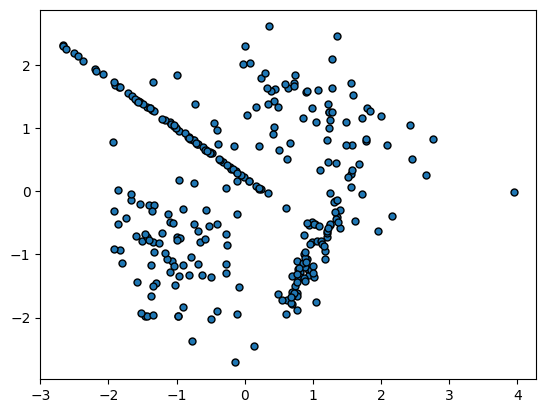

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o', s=25, edgecolor="k")
plt.show()

In [4]:
X2, y2 = make_classification(n_samples=300, n_classes=1, n_features=2, n_redundant=0, n_clusters_per_class=3, flip_y=0, random_state=111)

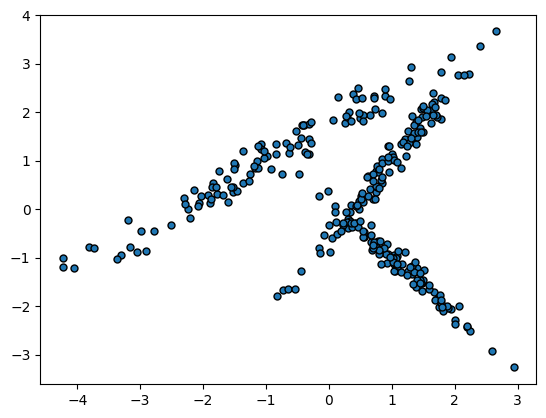

In [5]:
plt.scatter(X2[:, 0], X2[:, 1], marker='o', s=25, edgecolor="k")
plt.show()

In [6]:
X3, y3 = make_classification(n_samples=300, n_classes=3, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=76)

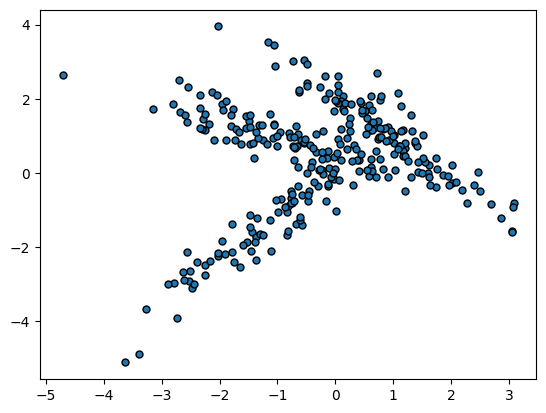

In [7]:
plt.scatter(X3[:, 0], X3[:, 1], marker='o', s=25, edgecolor="k")
plt.show()

In [8]:
X4, y4 = make_blobs(n_samples=300, n_features=2, cluster_std=1, centers=7, random_state=762)

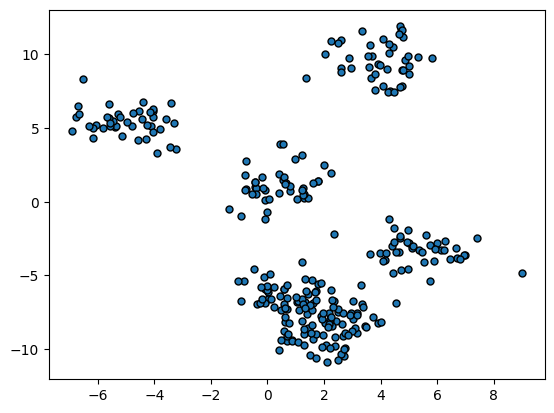

In [9]:
plt.scatter(X4[:, 0], X4[:, 1], marker='o', s=25, edgecolor="k")
plt.show()

In [69]:
X5, y5 = make_blobs(n_samples=300, n_features=2, cluster_std=1, centers=10, random_state=421)

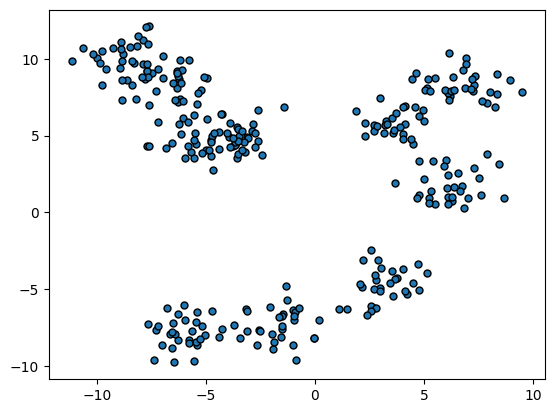

In [70]:
plt.scatter(X5[:, 0], X5[:, 1], marker='o', s=25, edgecolor="k")
plt.show()

# Загрузка данных

In [3]:
df = pd.read_csv(r"../../data/airlines_label_encoding.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [4]:
df.head()

Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
0      305    3036          144         58          4  1195   131.0      0
1      298     315           84        218          7   707   145.0      0
2      219    6673          265        204          5   499    42.0      1
3      303    3668          229        218          2   810    70.0      1
4       17     623          162        226          5   985   143.0      0

In [5]:
X = df.drop(columns=["Delay"], axis=1).to_numpy()
y = df["Delay"].to_numpy()

# 1. K-means

# Первый датасет

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score, silhouette_score, fowlkes_mallows_score, davies_bouldin_score

In [16]:
kmeans_1 = KMeans(n_clusters=4).fit(X1)

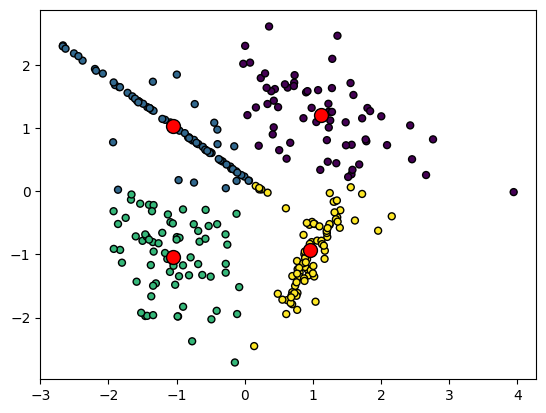

In [17]:
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans_1.labels_, edgecolors="k", s=25)
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

In [18]:
print(f"Rand Index: {round(rand_score(y1, kmeans_1.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y1, kmeans_1.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X1, kmeans_1.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X1, kmeans_1.labels_), 2)}")

Rand Index: 0.69
Fowlkes Mallows Score: 0.62
Silhouette score: 0.48
Davies Bouldin score: 0.71


## Поиск оптимального числа кластеров

In [19]:
inertias = []
ss = []
for i in range(2, 10):
    m = KMeans(i).fit(X1)
    inertias.append(m.inertia_)
    ss.append(silhouette_score(X1, m.labels_))
    if i == 6:
        best_k_mean_1 = m

## Метод локтя

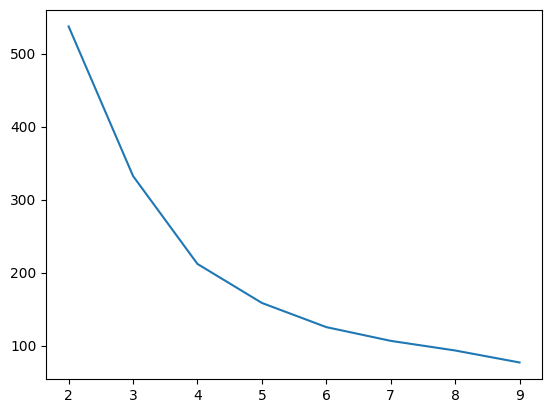

In [20]:
plt.plot(range(2, 10), inertias)

## Метод силуэта

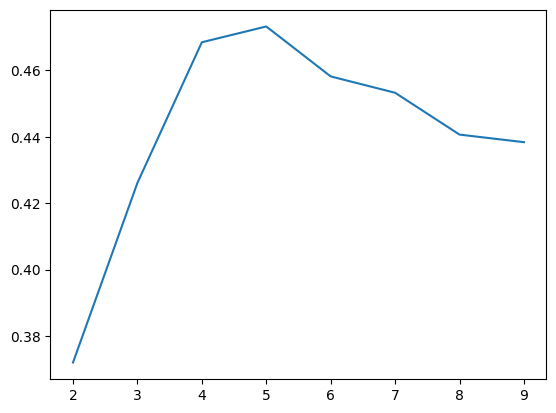

In [21]:
plt.plot(range(2, 10), ss)

Видим, что оптимальное число кластеров для первого датасета, судя по этим методам: 6

In [22]:
k_means_1_scores = [
    round(rand_score(y1, kmeans_1.labels_), 2),
    round(fowlkes_mallows_score(y1, kmeans_1.labels_), 2),
    round(silhouette_score(X1, kmeans_1.labels_), 2),
    round(davies_bouldin_score(X1, kmeans_1.labels_), 2)
]

In [23]:
print(f"Rand Index: {round(rand_score(y1, best_k_mean_1.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y1, best_k_mean_1.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X1, best_k_mean_1.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X1, best_k_mean_1.labels_), 2)}")

Rand Index: 0.64
Fowlkes Mallows Score: 0.53
Silhouette score: 0.46
Davies Bouldin score: 0.7


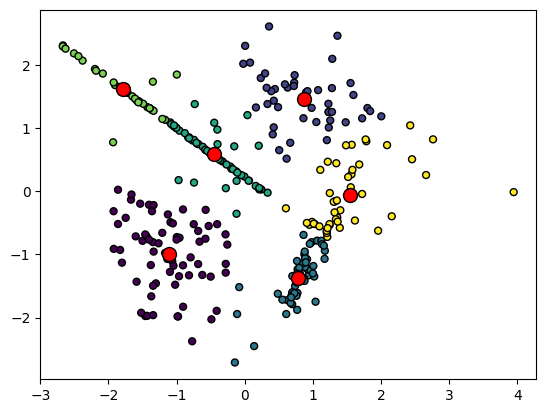

In [24]:
plt.scatter(X1[:, 0], X1[:, 1], c=best_k_mean_1.labels_, edgecolors="k", s=25)
plt.scatter(best_k_mean_1.cluster_centers_[:, 0], best_k_mean_1.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

Видим, что несмотря на то, что по методу локтя и силуэтов модель с 6 кластерами является лучшей, модель с 4 кластерами логичнее с практической точки зрения разделяет данные

In [25]:
k_means_1_with_2_clusters = KMeans(n_clusters=2).fit(X1)

In [26]:
df_k_means_1 = pd.concat([pd.DataFrame(X1), pd.DataFrame(y1), pd.DataFrame(k_means_1_with_2_clusters.labels_)], axis=1)
df_k_means_1

0         1  0  0
0   -0.405177 -0.518846  0  1
1   -0.489374 -2.028352  0  1
2    1.205500  0.814090  1  0
3    0.862709 -0.689340  1  0
4    1.556337  0.066753  1  0
..        ...       ... .. ..
295  0.720777  1.672194  1  0
296  0.212584  0.055650  0  0
297  1.108653  0.342565  1  0
298  0.880494 -0.953298  1  0
299  0.078112  2.043518  1  1

[300 rows x 4 columns]

In [27]:
rand_score(y1, k_means_1_with_2_clusters.labels_)

0.8247714604236344

# Второй датасет

In [28]:
kmeans_2 = KMeans(n_clusters=3).fit(X2)

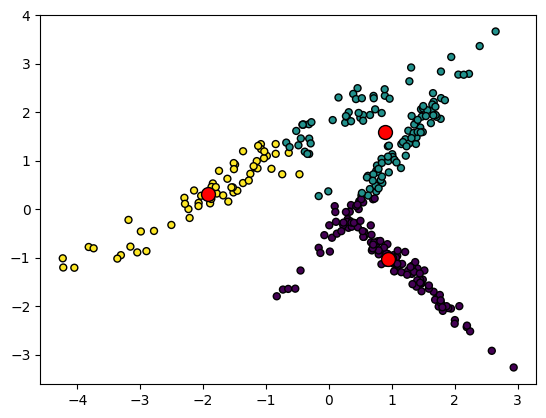

In [29]:
plt.scatter(X2[:, 0], X2[:, 1], c=kmeans_2.labels_, edgecolors="k", s=25)
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

In [30]:
print(f"Rand Index: {round(rand_score(y2, kmeans_2.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y2, kmeans_2.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X2, kmeans_2.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X2, kmeans_2.labels_), 2)}")

Rand Index: 0.36
Fowlkes Mallows Score: 0.6
Silhouette score: 0.52
Davies Bouldin score: 0.64


## Поиск оптимального числа кластеров

In [31]:
inertias = []
ss = []
for i in range(2, 10):
    m = KMeans(i).fit(X2)
    inertias.append(m.inertia_)
    ss.append(silhouette_score(X2, m.labels_))
    if i == 5:
        best_k_mean_2 = m

## Метод локтя

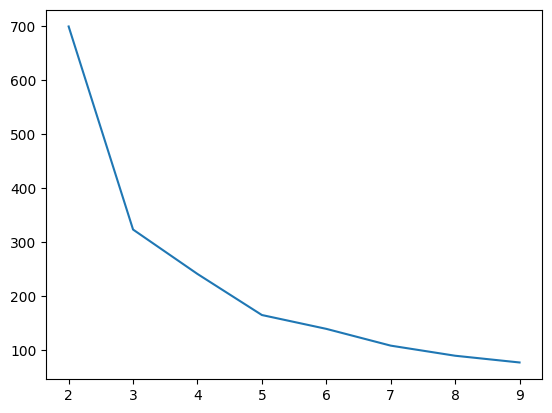

In [32]:
plt.plot(range(2, 10), inertias)

## Метод силуэта

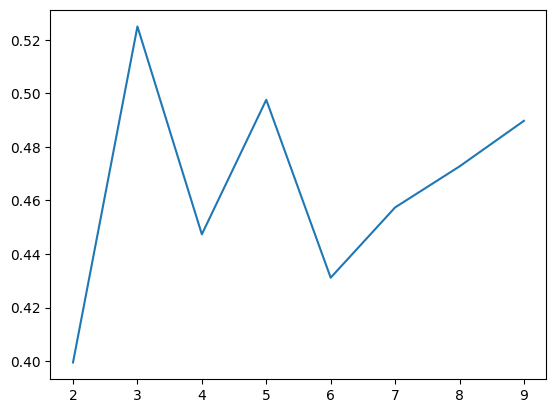

In [33]:
plt.plot(range(2, 10), ss)

Видим, что оптимальное число кластеров для первого датасета, судя по этим методам: 5

In [34]:
k_means_2_scores = [
    round(rand_score(y2, kmeans_2.labels_), 2),
    round(fowlkes_mallows_score(y2, kmeans_2.labels_), 2),
    round(silhouette_score(X2, kmeans_2.labels_), 2),
    round(davies_bouldin_score(X2, kmeans_2.labels_), 2)
]

In [35]:
print(f"Rand Index: {round(rand_score(y2, best_k_mean_2.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y2, best_k_mean_2.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X2, best_k_mean_2.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X2, best_k_mean_2.labels_), 2)}")

Rand Index: 0.23
Fowlkes Mallows Score: 0.47
Silhouette score: 0.5
Davies Bouldin score: 0.64


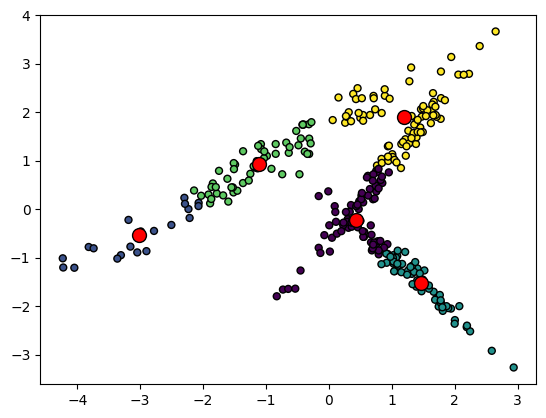

In [36]:
plt.scatter(X2[:, 0], X2[:, 1], c=best_k_mean_2.labels_, edgecolors="k", s=25)
plt.scatter(best_k_mean_2.cluster_centers_[:, 0], best_k_mean_2.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

Видим, что несмотря на то, что по методу локтя и силуэтов модель с 5 кластерами является лучшей, модель с 3 кластерами логичнее с практической точки зрения разделяет данные

In [37]:
k_means_2_with_2_clusters = KMeans(n_clusters=2).fit(X2)

In [38]:
df_k_means_2 = pd.concat([pd.DataFrame(X2), pd.DataFrame(y2), pd.DataFrame(k_means_2_with_2_clusters.labels_)], axis=1)
df_k_means_2

0         1  0  0
0   -0.008778  0.370369  0  1
1    1.518698 -1.261123  0  0
2   -2.213519 -0.178409  0  1
3    1.465083  2.063991  0  1
4    0.299203 -0.203750  0  0
..        ...       ... .. ..
295  0.940001  1.087143  0  1
296  1.445747 -1.323060  0  0
297 -1.363494  1.197718  0  1
298  1.543042  1.923768  0  1
299 -0.844842  1.144451  0  1

[300 rows x 4 columns]

In [39]:
rand_score(y2, k_means_2_with_2_clusters.labels_)

0.5134002229654404

# Третий датасет

In [40]:
kmeans_3 = KMeans(n_clusters=3).fit(X3)

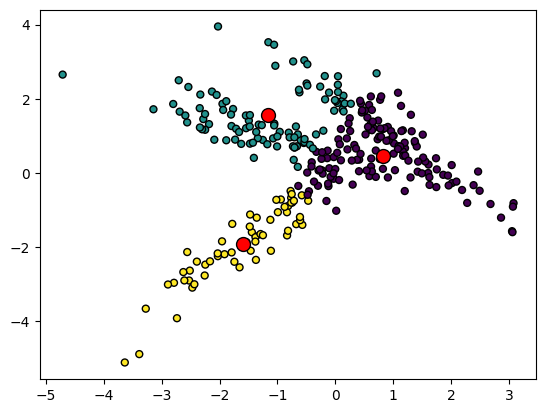

In [41]:
plt.scatter(X3[:, 0], X3[:, 1], c=kmeans_3.labels_, edgecolors="k", s=25)
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

In [42]:
print(f"Rand Index: {round(rand_score(y3, kmeans_3.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y3, kmeans_3.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X3, kmeans_3.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X3, kmeans_3.labels_), 2)}")

Rand Index: 0.67
Fowlkes Mallows Score: 0.53
Silhouette score: 0.43
Davies Bouldin score: 0.81


## Поиск оптимального числа кластеров

In [43]:
inertias = []
ss = []
for i in range(2, 10):
    m = KMeans(i).fit(X3)
    inertias.append(m.inertia_)
    ss.append(silhouette_score(X3, m.labels_))
    if i == 5:
        best_k_mean_3 = m

## Метод локтя

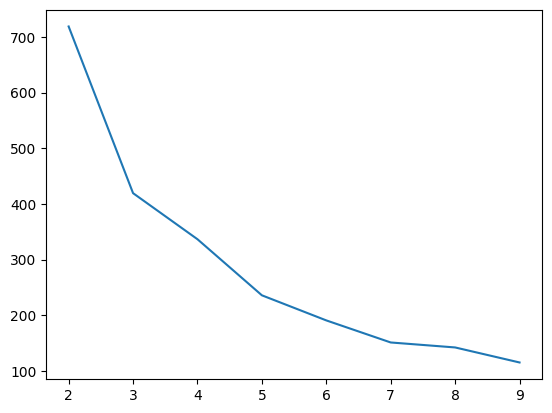

In [44]:
plt.plot(range(2, 10), inertias)

## Метод силуэта

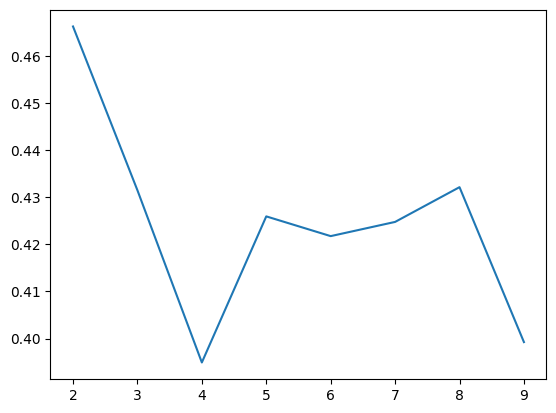

In [45]:
plt.plot(range(2, 10), ss)

Видим, что оптимальное число кластеров для первого датасета, судя по этим методам: 5

In [600]:
k_means_3_scores = [
    round(rand_score(y3, kmeans_3.labels_), 2),
    round(fowlkes_mallows_score(y3, kmeans_3.labels_), 2),
    round(silhouette_score(X3, kmeans_3.labels_), 2),
    round(davies_bouldin_score(X3, kmeans_3.labels_), 2)
]

In [47]:
print(f"Rand Index: {round(rand_score(y3, best_k_mean_3.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y3, best_k_mean_3.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X3, best_k_mean_3.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X3, best_k_mean_3.labels_), 2)}")

Rand Index: 0.72
Fowlkes Mallows Score: 0.5
Silhouette score: 0.43
Davies Bouldin score: 0.71


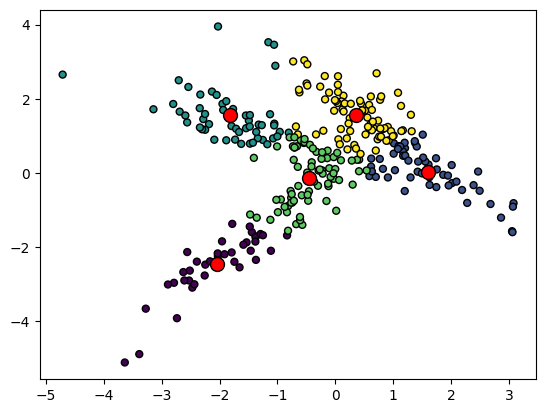

In [48]:
plt.scatter(X3[:, 0], X3[:, 1], c=best_k_mean_3.labels_, edgecolors="k", s=25)
plt.scatter(best_k_mean_3.cluster_centers_[:, 0], best_k_mean_3.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

Видим, что несмотря на то, что по методу локтя и силуэтов модель с 5 кластерами является лучшей, модель с 3 кластерами логичнее с практической точки зрения разделяет данные

In [49]:
k_means_3_with_2_clusters = KMeans(n_clusters=2).fit(X3)

In [50]:
df_k_means_3 = pd.concat([pd.DataFrame(X3), pd.DataFrame(y3), pd.DataFrame(k_means_3_with_2_clusters.labels_)], axis=1)
df_k_means_3

0         1  0  0
0    1.011205  0.799172  0  0
1    0.618930  0.389110  1  0
2   -2.027160  3.949443  0  0
3   -0.140783  0.401343  2  0
4   -1.252705  0.890957  1  0
..        ...       ... .. ..
295 -1.037088  2.890748  0  0
296 -0.611835 -1.184663  2  1
297 -2.392665 -2.387684  2  1
298 -2.032687 -2.166788  2  1
299 -0.228509  0.558961  1  0

[300 rows x 4 columns]

In [51]:
rand_score(y3, k_means_3_with_2_clusters.labels_)

0.5402675585284281

# Четвёртый датасет

In [52]:
kmeans_4 = KMeans(n_clusters=5).fit(X4)

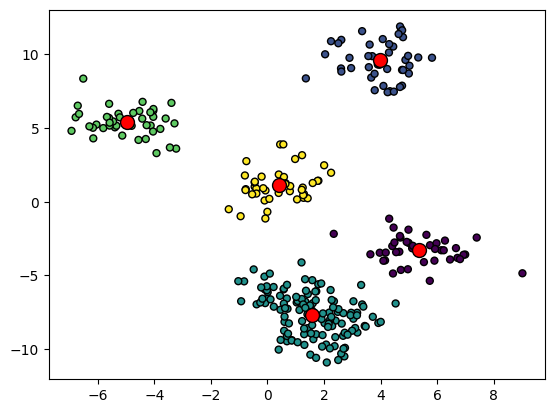

In [53]:
plt.scatter(X4[:, 0], X4[:, 1], c=kmeans_4.labels_, edgecolors="k", s=25)
plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

In [54]:
print(f"Silhouette score: {round(silhouette_score(X4, kmeans_4.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X4, kmeans_4.labels_), 2)}")

Silhouette score: 0.67
Davies Bouldin score: 0.41


## Поиск оптимального числа кластеров

In [55]:
inertias = []
ss = []
for i in range(2, 10):
    m = KMeans(i).fit(X4)
    inertias.append(m.inertia_)
    ss.append(silhouette_score(X4, m.labels_))
    if i == 5:
        best_k_mean_4 = m

## Метод локтя

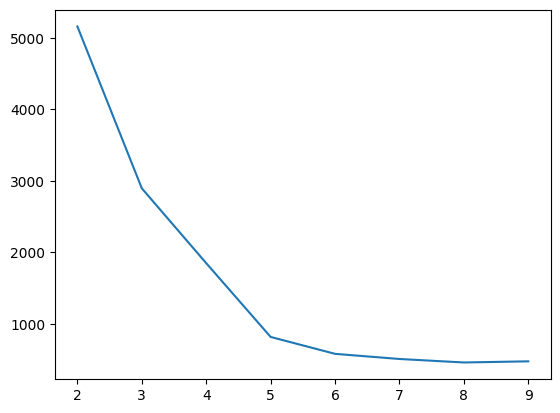

In [56]:
plt.plot(range(2, 10), inertias)

## Метод силуэта

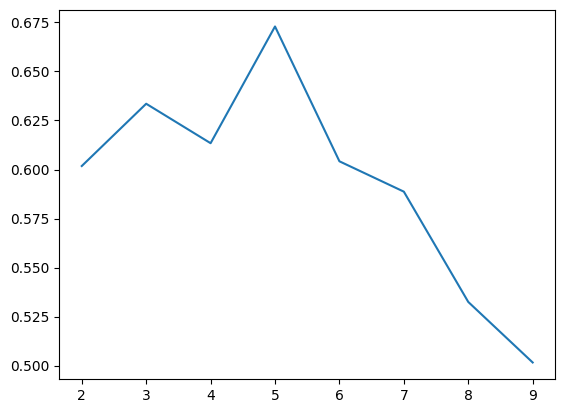

In [57]:
plt.plot(range(2, 10), ss)

Видим, что оптимальное число кластеров для первого датасета, судя по этим методам: 5

In [599]:
k_means_4_scores = [
    round(silhouette_score(X4, kmeans_4.labels_), 2),
    round(davies_bouldin_score(X4, kmeans_4.labels_), 2)
]

In [59]:
print(f"Silhouette score: {round(silhouette_score(X4, best_k_mean_4.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X4, best_k_mean_4.labels_), 2)}")

Silhouette score: 0.67
Davies Bouldin score: 0.41


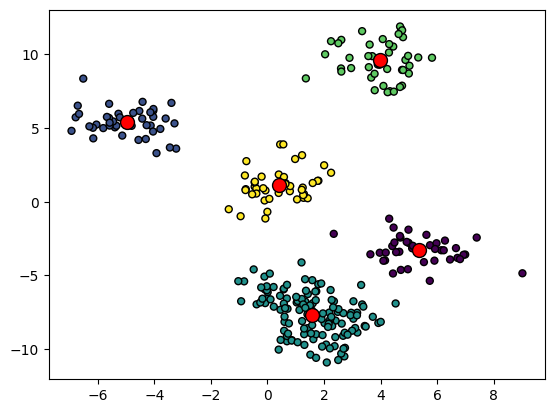

In [60]:
plt.scatter(X4[:, 0], X4[:, 1], c=best_k_mean_4.labels_, edgecolors="k", s=25)
plt.scatter(best_k_mean_4.cluster_centers_[:, 0], best_k_mean_4.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

In [61]:
k_means_4_with_2_clusters = KMeans(n_clusters=2).fit(X4)

In [62]:
df_k_means_4 = pd.concat([pd.DataFrame(X4), pd.DataFrame(k_means_4_with_2_clusters.labels_)], axis=1)
df_k_means_4

0          1  0
0    1.451879  -8.638007  0
1    1.797201  -5.606890  0
2   -0.824050  -5.406772  0
3    2.098123 -10.914624  0
4    0.862215  -9.398835  0
..        ...        ... ..
295  4.099281  -4.006377  0
296  2.322062  -7.173685  0
297  0.624299  -7.227119  0
298  1.774106   1.417766  1
299  1.599512   1.270978  1

[300 rows x 3 columns]

# Пятый датасет

In [73]:
kmeans_5 = KMeans(n_clusters=7).fit(X5)

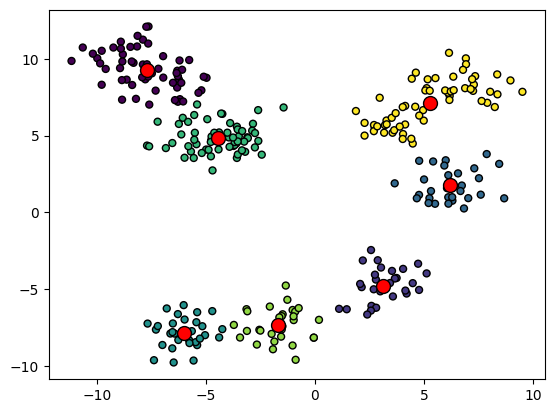

In [74]:
plt.scatter(X5[:, 0], X5[:, 1], c=kmeans_5.labels_, edgecolors="k", s=25)
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

In [75]:
print(f"Silhouette score: {round(silhouette_score(X5, kmeans_5.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X5, kmeans_5.labels_), 2)}")

Silhouette score: 0.58
Davies Bouldin score: 0.58


## Поиск оптимального числа кластеров

In [87]:
inertias = []
ss = []
for i in range(2, 10):
    m = KMeans(i).fit(X5)
    inertias.append(m.inertia_)
    ss.append(silhouette_score(X5, m.labels_))
    if i == 5:
        best_k_mean_5 = m

## Метод локтя

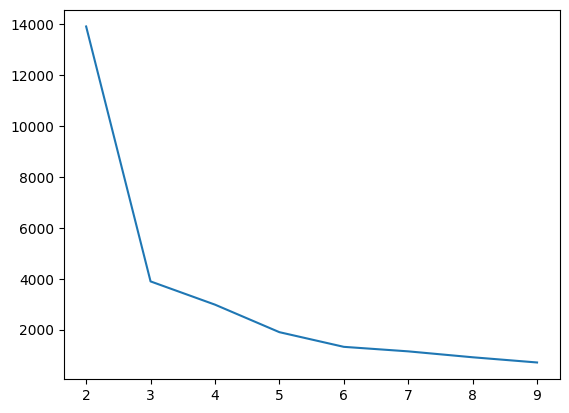

In [88]:
plt.plot(range(2, 10), inertias)

## Метод силуэта

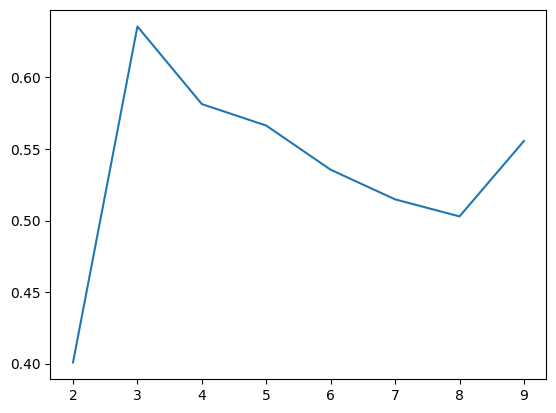

In [89]:
plt.plot(range(2, 10), ss)

Видим, что оптимальное число кластеров для первого датасета, судя по этим методам: 5

In [90]:
k_means_5_scores = [
    round(silhouette_score(X5, kmeans_5.labels_), 2),
    round(davies_bouldin_score(X5, kmeans_5.labels_), 2)
]

In [91]:
print(f"Silhouette score: {round(silhouette_score(X5, best_k_mean_5.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X5, best_k_mean_5.labels_), 2)}")

Silhouette score: 0.57
Davies Bouldin score: 0.61


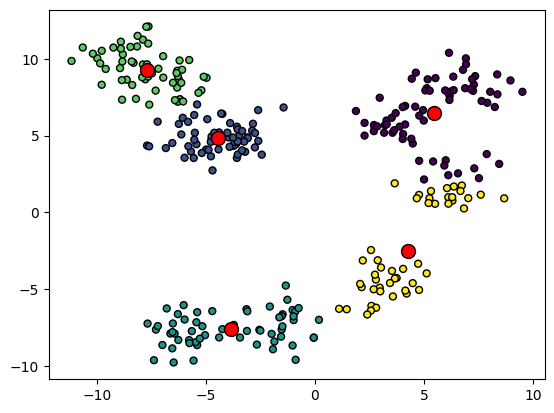

In [93]:
plt.scatter(X5[:, 0], X5[:, 1], c=best_k_mean_5.labels_, edgecolors="k", s=25)
plt.scatter(best_k_mean_5.cluster_centers_[:, 0], best_k_mean_5.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

Видим, что несмотря на то, что по методу локтя и силуэтов модель с 5 кластерами является лучшей, модель с 7 кластерами логичнее с практической точки зрения разделяет данные

In [95]:
k_means_5_with_2_clusters = KMeans(n_clusters=2).fit(X5)

In [96]:
df_k_means_5 = pd.concat([pd.DataFrame(X5), pd.DataFrame(k_means_5_with_2_clusters.labels_)], axis=1)
df_k_means_5

0         1  0
0   -7.696013  4.351636  0
1   -2.595782  4.655135  0
2   -2.547757 -7.633767  1
3    2.717626 -6.198393  1
4   -1.552307 -8.079397  1
..        ...       ... ..
295 -8.203482  7.391573  0
296  4.415270  4.796714  0
297  4.778475  6.303337  0
298 -5.977106  3.560154  0
299  3.285443  5.735195  0

[300 rows x 3 columns]

# Датасет из кластеризации

In [7]:
X6 = df[["AirportFrom", "AirportTo"]].to_numpy()
y6 = df["Delay"].to_numpy()

In [8]:
X6 = X6[:2000]
y6 = y6[:2000]

In [9]:
kmeans_6 = KMeans(n_clusters=3).fit(X6)

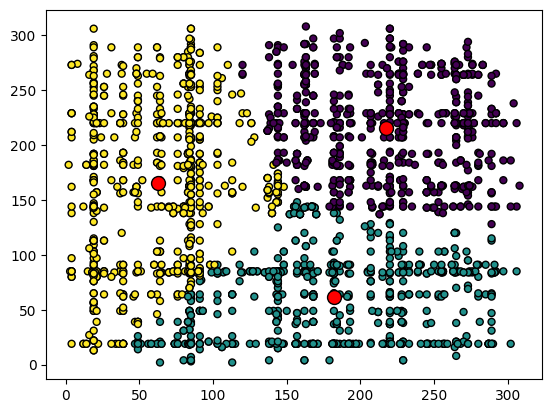

In [10]:
plt.scatter(X6[:, 0], X6[:, 1], c=kmeans_6.labels_, edgecolors="k", s=25)
plt.scatter(kmeans_6.cluster_centers_[:, 0], kmeans_6.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

In [11]:
print(f"Rand Index: {round(rand_score(y6, kmeans_6.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y6, kmeans_6.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X6, kmeans_6.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X6, kmeans_6.labels_), 2)}")

Rand Index: 0.45
Fowlkes Mallows Score: 0.46
Silhouette score: 0.4
Davies Bouldin score: 0.84


## Поиск оптимального числа кластеров

In [12]:
inertias = []
ss = []
for i in range(2, 10):
    m = KMeans(i).fit(X6)
    inertias.append(m.inertia_)
    ss.append(silhouette_score(X6, m.labels_))
    if i == 4:
        best_k_mean_6 = m

## Метод локтя

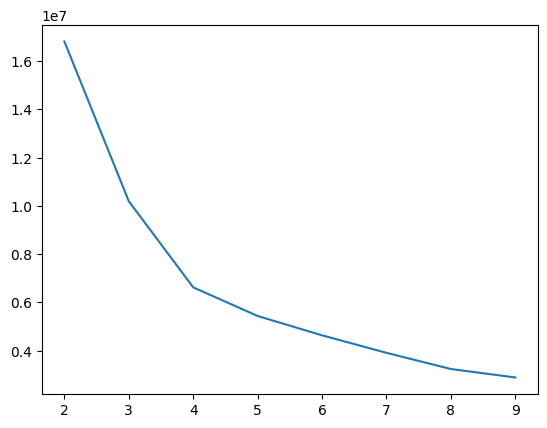

In [13]:
plt.plot(range(2, 10), inertias)

## Метод силуэта

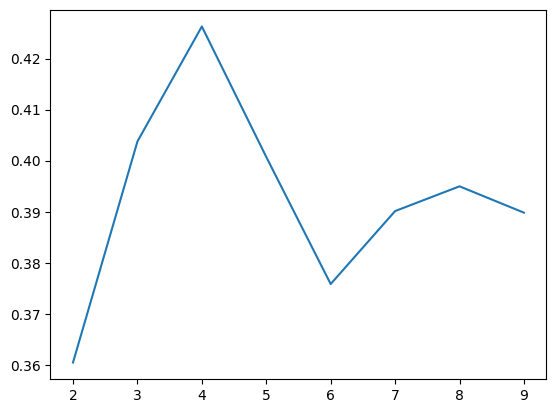

In [14]:
plt.plot(range(2, 10), ss)

Видим, что оптимальное число кластеров для первого датасета, судя по этим методам: 5

In [15]:
k_means_6_scores = [
    round(rand_score(y6, kmeans_6.labels_), 2),
    round(fowlkes_mallows_score(y6, kmeans_6.labels_), 2),
    round(silhouette_score(X6, kmeans_6.labels_), 2),
    round(davies_bouldin_score(X6, kmeans_6.labels_), 2)
]

In [16]:
print(f"Rand Index: {round(rand_score(y6, best_k_mean_6.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y6, best_k_mean_6.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X6, best_k_mean_6.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X6, best_k_mean_6.labels_), 2)}")

Rand Index: 0.43
Fowlkes Mallows Score: 0.41
Silhouette score: 0.43
Davies Bouldin score: 0.74


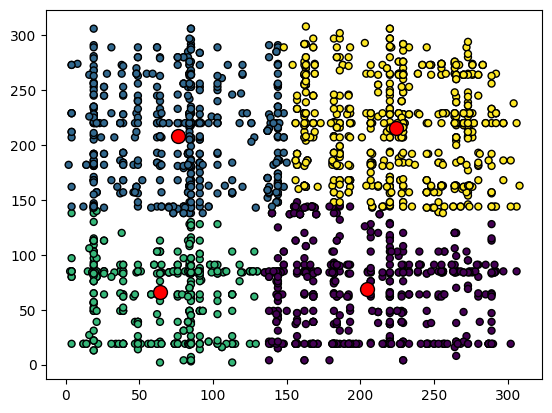

In [17]:
plt.scatter(X6[:, 0], X6[:, 1], c=best_k_mean_6.labels_, edgecolors="k", s=25)
plt.scatter(best_k_mean_6.cluster_centers_[:, 0], best_k_mean_6.cluster_centers_[:, 1], c="red", s=100, edgecolors="k")
plt.show()

В данной ситуации поит невозможо делать кластеризацию

In [18]:
k_means_6_with_2_clusters = KMeans(n_clusters=2).fit(X6)

In [19]:
df_k_means_6 = pd.concat([pd.DataFrame(X6), pd.DataFrame(y6), pd.DataFrame(k_means_6_with_2_clusters.labels_)], axis=1)
df_k_means_6

0    1  0  0
0     144   58  0  1
1      84  218  0  1
2     265  204  1  0
3     229  218  1  0
4     162  226  0  0
...   ...  ... .. ..
1995   19   83  0  1
1996   19  113  1  1
1997  220   65  0  0
1998  192   19  0  0
1999  144   80  0  1

[2000 rows x 4 columns]

In [20]:
rand_score(y6, k_means_6_with_2_clusters.labels_)

0.4997743871935968

In [21]:
df_k_means_6 = pd.concat([pd.DataFrame(X6), pd.DataFrame(y6)], axis=1)

In [22]:
df_k_means_6

0    1  0
0     144   58  0
1      84  218  0
2     265  204  1
3     229  218  1
4     162  226  0
...   ...  ... ..
1995   19   83  0
1996   19  113  1
1997  220   65  0
1998  192   19  0
1999  144   80  0

[2000 rows x 3 columns]

In [23]:
df_k_means_6.columns = ["AiportFrom", "AirportTo", "y_true"]

In [24]:
df_k_means_6.head()

AiportFrom  AirportTo  y_true
0         144         58       0
1          84        218       0
2         265        204       1
3         229        218       1
4         162        226       0

In [25]:
df_k_means_6["Cluster_id"] = best_k_mean_6.labels_

In [28]:
df_k_means_6.groupby('Cluster_id').apply(lambda x: x.mode().iloc[0])

0           AiportFrom  AirportTo  y_true  Cluster_id
Cluster_id                                           
0                  220         19       0           0
1                   19        220       0           1
2                   19         19       0           2
3                  220        220       0           3

# 2. Иерархическая кластеризация

In [607]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import scipy.cluster.hierarchy as sch

In [139]:
hierarchy_params = {
    "n_clusters": np.arange(3, 10),
    "metric": ["l1", "l2"],
    "linkage": ["ward", "complete", "average", "single"]
}

In [162]:
def search_best_hierarchy_model(dataset):
    best_score = -1
    best_params = None
    best_model = None
    for params in ParameterGrid(hierarchy_params):
        # linkage='ward' поддерживает только metric='euclidean'
        if params["linkage"] == "ward" and params["metric"] != "euclidean":
            continue
        try:
            model = AgglomerativeClustering(
                n_clusters=params["n_clusters"],
                linkage=params["linkage"],
                metric=params["metric"] if params["linkage"] != "ward" else None
            )
            labels = model.fit_predict(dataset)
            score = silhouette_score(dataset, labels)
            if score > best_score:
                best_score = score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Ошибка на параметрах {params}: {e}")

    print("Лучшая модель по подбору гиперпараметров:")
    print(best_params)
    return best_model

# Первый датасет

In [163]:
best_hierarchy_model_1 = search_best_hierarchy_model(X1)

Лучшая модель по подбору гиперпараметров:
{'linkage': 'average', 'metric': 'l2', 'n_clusters': 6}


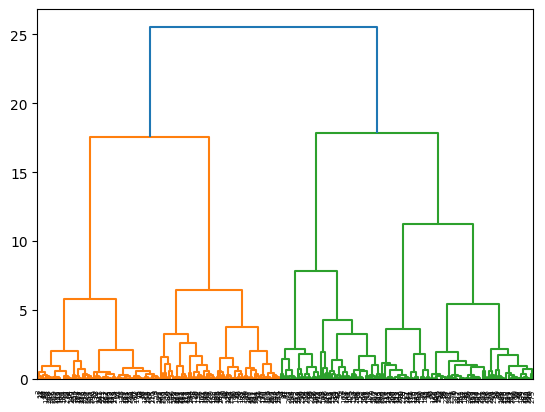

In [608]:
dend = sch.dendrogram(sch.linkage(X1,method='ward'))

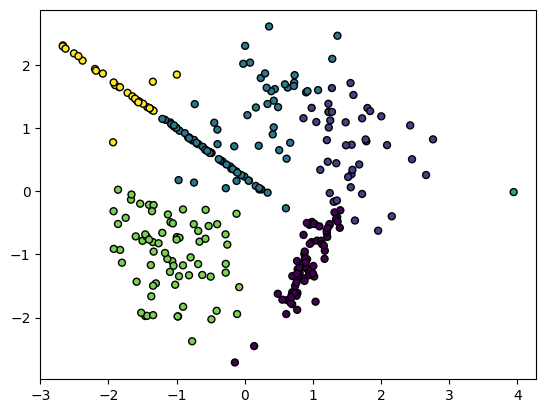

In [164]:
plt.scatter(X1[:, 0], X1[:, 1], c=best_hierarchy_model_1.labels_, edgecolors="k", s=25)
plt.show()

In [165]:
print(f"Rand Index: {round(rand_score(y1, best_hierarchy_model_1.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y1, best_hierarchy_model_1.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X1, best_hierarchy_model_1.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X1, best_hierarchy_model_1.labels_), 2)}")

Rand Index: 0.63
Fowlkes Mallows Score: 0.53
Silhouette score: 0.44
Davies Bouldin score: 0.66


In [159]:
hierarchy_1 = AgglomerativeClustering(n_clusters=4).fit(X1)

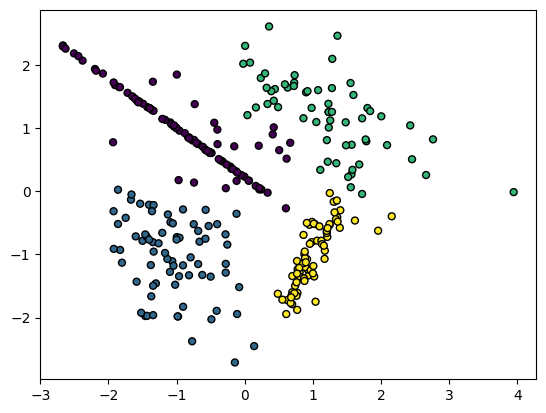

In [160]:
plt.scatter(X1[:, 0], X1[:, 1], c=hierarchy_1.labels_, edgecolors="k", s=25)
plt.show()

Видим, что данная модель лучше разделяет данные, хотя и метрика меньше

In [161]:
hierarchy_1_scores = [
    round(rand_score(y1, hierarchy_1.labels_), 2),
    round(fowlkes_mallows_score(y1, hierarchy_1.labels_), 2),
    round(silhouette_score(X1, hierarchy_1.labels_), 2),
    round(davies_bouldin_score(X1, hierarchy_1.labels_), 2)
]

In [197]:
print(f"Rand Index: {hierarchy_1_scores[0]}")
print(f"Fowlkes Mallows Score: {hierarchy_1_scores[1]}")
print(f"Silhouette score: {hierarchy_1_scores[2]}")
print(f"Davies Bouldin score: {hierarchy_1_scores[3]}")

Rand Index: 0.69
Fowlkes Mallows Score: 0.62
Silhouette score: 0.46
Davies Bouldin score: 0.75


# Второй датасет

In [166]:
best_hierarchy_model_2 = search_best_hierarchy_model(X2)

Лучшая модель по подбору гиперпараметров:
{'linkage': 'average', 'metric': 'l1', 'n_clusters': 4}


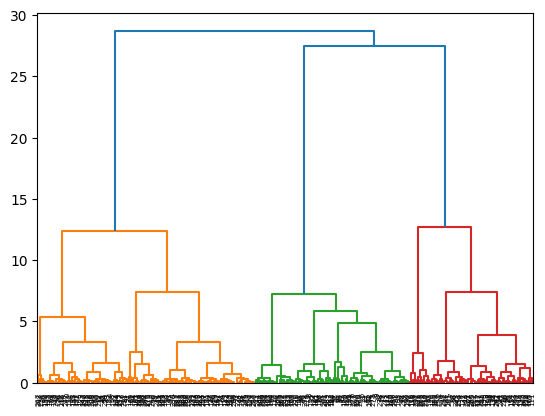

In [609]:
dend = sch.dendrogram(sch.linkage(X2,method='ward'))

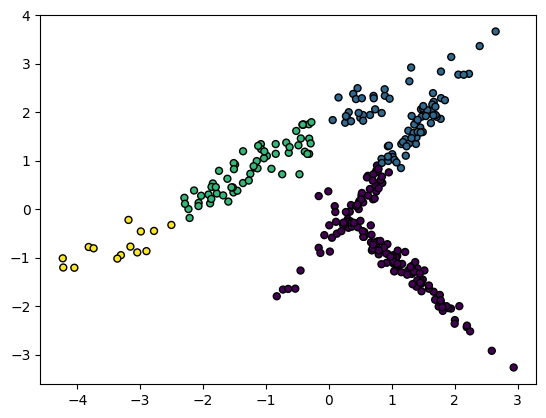

In [167]:
plt.scatter(X2[:, 0], X2[:, 1], c=best_hierarchy_model_2.labels_, edgecolors="k", s=25)
plt.show()

In [168]:
print(f"Rand Index: {round(rand_score(y2, best_hierarchy_model_2.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y2, best_hierarchy_model_2.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X2, best_hierarchy_model_2.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X2, best_hierarchy_model_2.labels_), 2)}")

Rand Index: 0.34
Fowlkes Mallows Score: 0.59
Silhouette score: 0.52
Davies Bouldin score: 0.58


In [171]:
hierarchy_2 = AgglomerativeClustering(n_clusters=3).fit(X2)

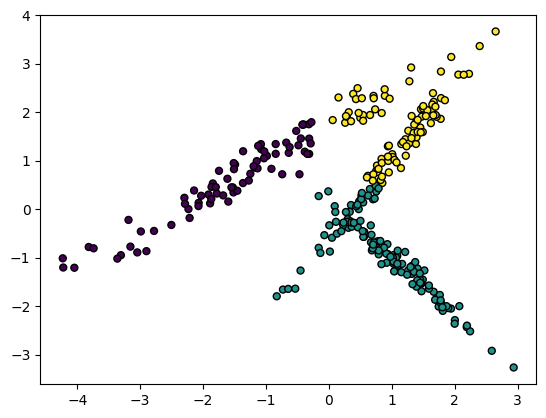

In [172]:
plt.scatter(X2[:, 0], X2[:, 1], c=hierarchy_2.labels_, edgecolors="k", s=25)
plt.show()

Видим, что данная модель лучше разделяет данные, хотя и метрика меньше

In [173]:
hierarchy_2_scores = [
    round(rand_score(y2, hierarchy_2.labels_), 2),
    round(fowlkes_mallows_score(y2, hierarchy_2.labels_), 2),
    round(silhouette_score(X2, hierarchy_2.labels_), 2),
    round(davies_bouldin_score(X2, hierarchy_2.labels_), 2)
]

In [196]:
print(f"Rand Index: {hierarchy_2_scores[0]}")
print(f"Fowlkes Mallows Score: {hierarchy_2_scores[1]}")
print(f"Silhouette score: {hierarchy_2_scores[2]}")
print(f"Davies Bouldin score: {hierarchy_2_scores[3]}")

Rand Index: 0.35
Fowlkes Mallows Score: 0.59
Silhouette score: 0.52
Davies Bouldin score: 0.65


# Третий датасет

In [176]:
best_hierarchy_model_3 = search_best_hierarchy_model(X3)

Лучшая модель по подбору гиперпараметров:
{'linkage': 'average', 'metric': 'l1', 'n_clusters': 3}


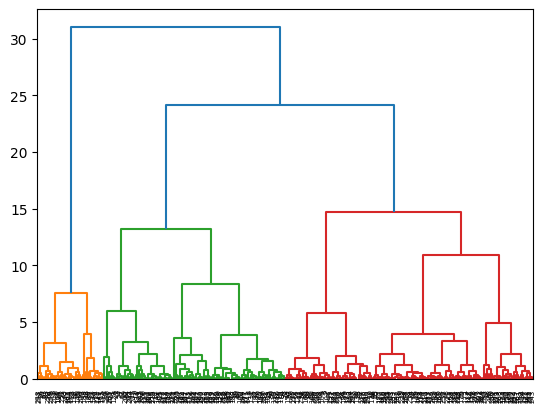

In [610]:
dend = sch.dendrogram(sch.linkage(X3,method='ward'))

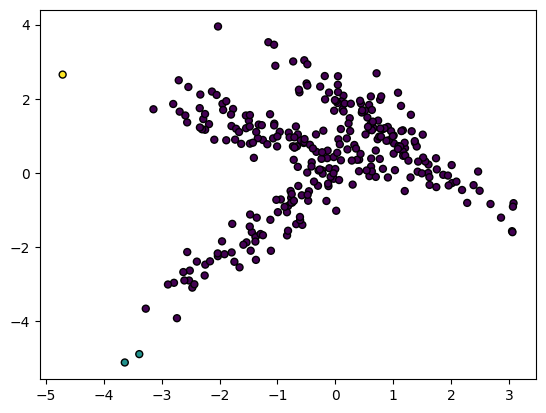

In [177]:
plt.scatter(X3[:, 0], X3[:, 1], c=best_hierarchy_model_3.labels_, edgecolors="k", s=25)
plt.show()

In [178]:
print(f"Rand Index: {round(rand_score(y3, best_hierarchy_model_3.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y3, best_hierarchy_model_3.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X3, best_hierarchy_model_3.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X3, best_hierarchy_model_3.labels_), 2)}")

Rand Index: 0.34
Fowlkes Mallows Score: 0.57
Silhouette score: 0.44
Davies Bouldin score: 0.33


In [191]:
hierarchy_3 = AgglomerativeClustering(n_clusters=3).fit(X3)

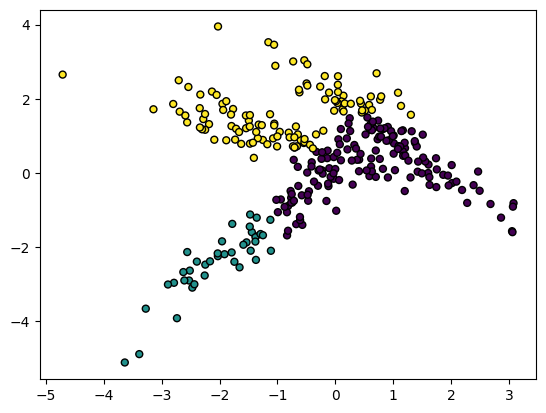

In [192]:
plt.scatter(X3[:, 0], X3[:, 1], c=hierarchy_3.labels_, edgecolors="k", s=25)
plt.show()

Видим, что данная модель лучше разделяет данные, хотя и метрика меньше

In [193]:
hierarchy_3_scores = [
    round(rand_score(y3, hierarchy_3.labels_), 2),
    round(fowlkes_mallows_score(y3, hierarchy_3.labels_), 2),
    round(silhouette_score(X3, hierarchy_3.labels_), 2),
    round(davies_bouldin_score(X3, hierarchy_3.labels_), 2)
]

In [195]:
print(f"Rand Index: {hierarchy_3_scores[0]}")
print(f"Fowlkes Mallows Score: {hierarchy_3_scores[1]}")
print(f"Silhouette score: {hierarchy_3_scores[2]}")
print(f"Davies Bouldin score: {hierarchy_3_scores[3]}")

Rand Index: 0.61
Fowlkes Mallows Score: 0.47
Silhouette score: 0.38
Davies Bouldin score: 0.89


# Четвёртый датасет

In [198]:
best_hierarchy_model_4 = search_best_hierarchy_model(X4)

Лучшая модель по подбору гиперпараметров:
{'linkage': 'average', 'metric': 'l1', 'n_clusters': 5}


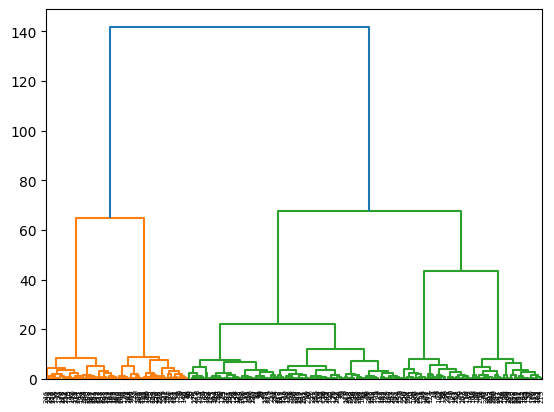

In [611]:
dend = sch.dendrogram(sch.linkage(X4,method='ward'))

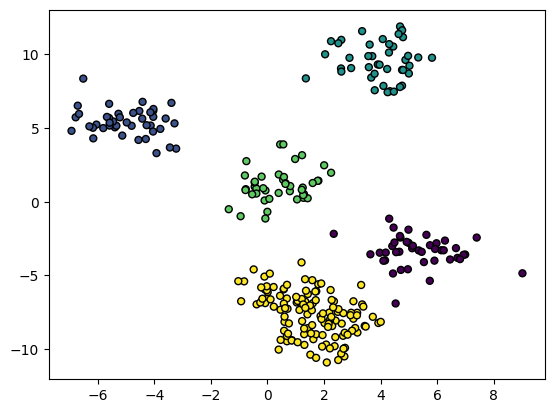

In [199]:
plt.scatter(X4[:, 0], X4[:, 1], c=best_hierarchy_model_4.labels_, edgecolors="k", s=25)
plt.show()

In [354]:
print(f"Silhouette score: {round(silhouette_score(X4, best_hierarchy_model_4.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X4, best_hierarchy_model_4.labels_), 2)}")

Silhouette score: 0.67
Davies Bouldin score: 0.42


Видим, что гиперпараметры подобраны хорошо

In [355]:
hierarchy_4_scores = [
    round(silhouette_score(X4, best_hierarchy_model_4.labels_), 2),
    round(davies_bouldin_score(X4, best_hierarchy_model_4.labels_), 2)
]

# Пятый датасет

In [216]:
best_hierarchy_model_5 = search_best_hierarchy_model(X5)

Лучшая модель по подбору гиперпараметров:
{'linkage': 'complete', 'metric': 'l1', 'n_clusters': 3}


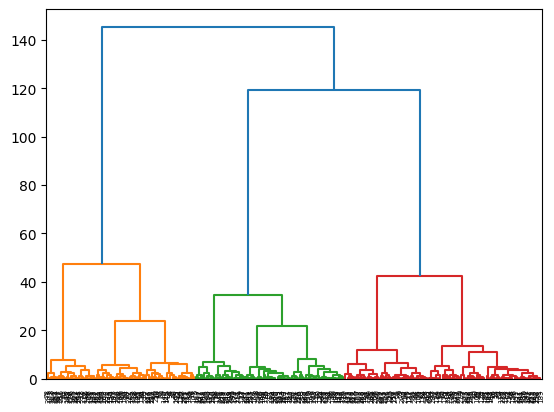

In [612]:
dend = sch.dendrogram(sch.linkage(X5,method='ward'))

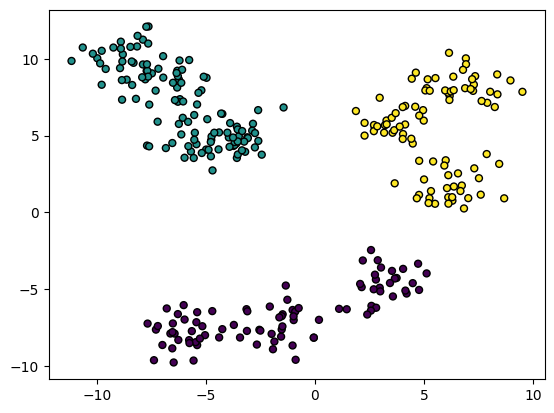

In [217]:
plt.scatter(X5[:, 0], X5[:, 1], c=best_hierarchy_model_5.labels_, edgecolors="k", s=25)
plt.show()

In [536]:
print(f"Silhouette score: {round(silhouette_score(X5, best_hierarchy_model_5.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X5, best_hierarchy_model_5.labels_), 2)}")

Silhouette score: 0.64
Davies Bouldin score: 0.52


Видим, что гиперпараметры подобраны хорошо

In [537]:
hierarchy_5_scores = [
    round(silhouette_score(X5, best_hierarchy_model_5.labels_), 2),
    round(davies_bouldin_score(X5, best_hierarchy_model_5.labels_), 2)
]

# DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
dbscan_params = {
    "eps": np.arange(0.1, 1, 0.1),
    "metric": ["l1", "l2"],
    "min_samples": np.arange(2, 10)
}

In [32]:
def search_best_dbscan_model(dataset):
    best_score = -1
    best_params = None
    best_model = None
    for params in ParameterGrid(dbscan_params):
        try:
            model = DBSCAN(
                eps=params["eps"],
                metric=params["metric"],
                min_samples=params["min_samples"]
            )
            labels = model.fit_predict(dataset)
            score = silhouette_score(dataset, labels)
            if score > best_score:
                best_score = score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Ошибка на параметрах {params}: {e}")

    print("Лучшая модель по подбору гиперпараметров:")
    print(best_params)
    return best_model

# Первый датасет

In [229]:
best_dbscan_model_1 = search_best_dbscan_model(X1)

Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 8}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 9}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Лучшая модель по подбору гиперпараметров:
{'eps': 0.8, 'metric': 'l2', 'min_samples': 2}


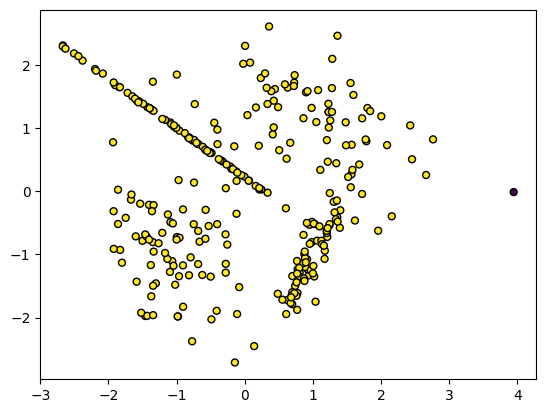

In [230]:
plt.scatter(X1[:, 0], X1[:, 1], c=best_dbscan_model_1.labels_, edgecolors="k", s=25)
plt.show()

In [231]:
print(f"Rand Index: {round(rand_score(y1, best_dbscan_model_1.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y1, best_dbscan_model_1.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X1, best_dbscan_model_1.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X1, best_dbscan_model_1.labels_), 2)}")

Rand Index: 0.5
Fowlkes Mallows Score: 0.7
Silhouette score: 0.44
Davies Bouldin score: 0.39


In [258]:
dbscan_1 = DBSCAN(eps=0.45).fit(X1)

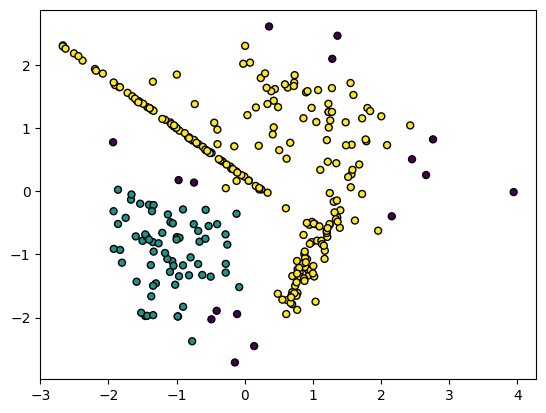

In [259]:
plt.scatter(X1[:, 0], X1[:, 1], c=dbscan_1.labels_, edgecolors="k", s=25)
plt.show()

Видим, что данная модель лучше разделяет данные, хотя и метрика меньше

In [260]:
dbscan_1_scores = [
    round(rand_score(y1, dbscan_1.labels_), 2),
    round(fowlkes_mallows_score(y1, dbscan_1.labels_), 2),
    round(silhouette_score(X1, dbscan_1.labels_), 2),
    round(davies_bouldin_score(X1, dbscan_1.labels_), 2)
]

In [261]:
print(f"Rand Index: {dbscan_1_scores[0]}")
print(f"Fowlkes Mallows Score: {dbscan_1_scores[1]}")
print(f"Silhouette score: {dbscan_1_scores[2]}")
print(f"Davies Bouldin score: {dbscan_1_scores[3]}")

Rand Index: 0.6
Fowlkes Mallows Score: 0.62
Silhouette score: 0.22
Davies Bouldin score: 4.08


# Второй датасет

In [262]:
best_dbscan_model_2 = search_best_dbscan_model(X2)

Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 8}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 9}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l2', 'min_samples': 9}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.6, 'metric': 'l2', 'min_samples': 2}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.6, 'metric': 'l2', 'min_samples': 3}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.7000000000000001, 'metric': 'l2', 'min_samples': 2}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.7000000000000001, 'metric': 'l2', 'min_samples': 3}: Number of labels is 1. Valid values are 2 to n_samples - 1 (i

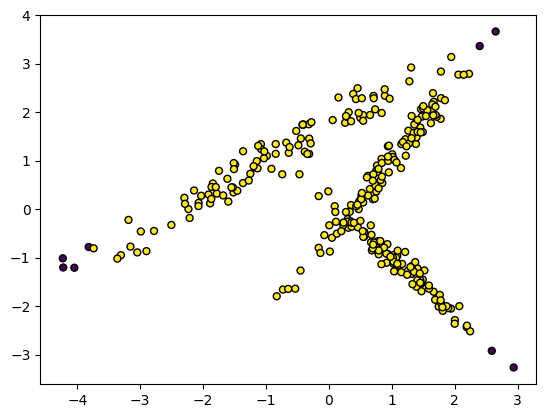

In [263]:
plt.scatter(X2[:, 0], X2[:, 1], c=best_dbscan_model_2.labels_, edgecolors="k", s=25)
plt.show()

In [264]:
print(f"Rand Index: {round(rand_score(y2, best_dbscan_model_2.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y2, best_dbscan_model_2.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X2, best_dbscan_model_2.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X2, best_dbscan_model_2.labels_), 2)}")

Rand Index: 0.95
Fowlkes Mallows Score: 0.97
Silhouette score: 0.48
Davies Bouldin score: 4.4


In [279]:
dbscan_2 = DBSCAN(eps=0.45).fit(X2)

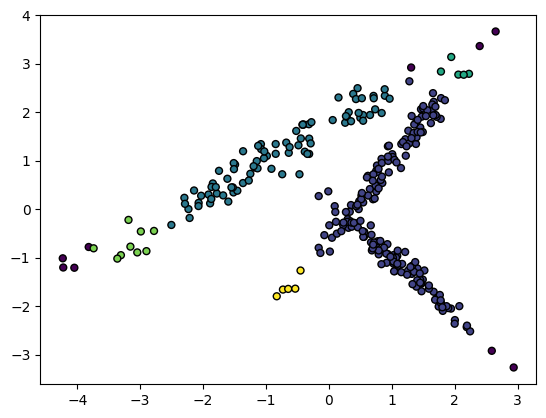

In [281]:
plt.scatter(X2[:, 0], X2[:, 1], c=dbscan_2.labels_, edgecolors="k", s=25)
plt.show()

Видим, что данная модель лучше разделяет данные, хотя и метрика меньше

In [282]:
dbscan_2_scores = [
    round(rand_score(y2, dbscan_2.labels_), 2),
    round(fowlkes_mallows_score(y2, dbscan_2.labels_), 2),
    round(silhouette_score(X2, dbscan_2.labels_), 2),
    round(davies_bouldin_score(X2, dbscan_2.labels_), 2)
]

In [283]:
print(f"Rand Index: {dbscan_2_scores[0]}")
print(f"Fowlkes Mallows Score: {dbscan_2_scores[1]}")
print(f"Silhouette score: {dbscan_2_scores[2]}")
print(f"Davies Bouldin score: {dbscan_2_scores[3]}")

Rand Index: 0.47
Fowlkes Mallows Score: 0.69
Silhouette score: 0.14
Davies Bouldin score: 2.86


# Третий датасет

In [284]:
best_dbscan_model_3 = search_best_dbscan_model(X3)

Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 5}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 6}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 7}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 8}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 9}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l2', 'min_samples': 5}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l2', 'min_samples': 6}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах

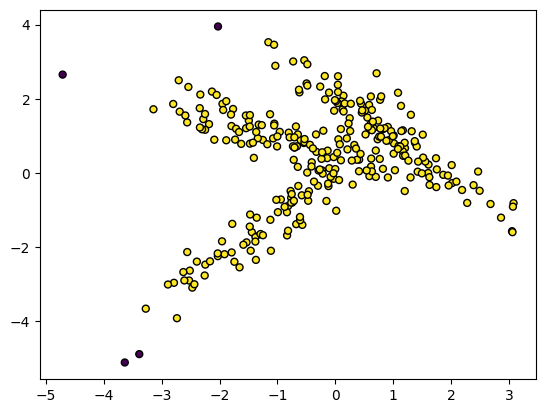

In [285]:
plt.scatter(X3[:, 0], X3[:, 1], c=best_dbscan_model_3.labels_, edgecolors="k", s=25)
plt.show()

In [286]:
print(f"Rand Index: {round(rand_score(y3, best_dbscan_model_3.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y3, best_dbscan_model_3.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X3, best_dbscan_model_3.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X3, best_dbscan_model_3.labels_), 2)}")

Rand Index: 0.34
Fowlkes Mallows Score: 0.57
Silhouette score: 0.55
Davies Bouldin score: 1.75


In [294]:
dbscan_3 = DBSCAN(eps=0.5).fit(X3)

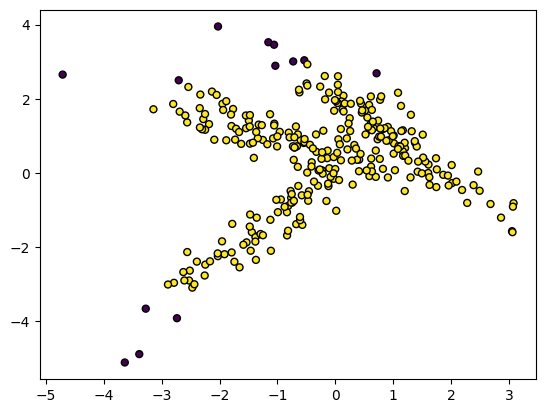

In [295]:
plt.scatter(X3[:, 0], X3[:, 1], c=dbscan_3.labels_, edgecolors="k", s=25)
plt.show()

Видим, что данная модель лучше разделяет данные, хотя и метрика меньше

In [298]:
dbscan_3_scores = [
    round(rand_score(y3, best_dbscan_model_3.labels_), 2),
    round(fowlkes_mallows_score(y3, best_dbscan_model_3.labels_), 2),
    round(silhouette_score(X3, best_dbscan_model_3.labels_), 2),
    round(davies_bouldin_score(X3, best_dbscan_model_3.labels_), 2)
]

In [299]:
print(f"Rand Index: {dbscan_3_scores[0]}")
print(f"Fowlkes Mallows Score: {dbscan_3_scores[1]}")
print(f"Silhouette score: {dbscan_3_scores[2]}")
print(f"Davies Bouldin score: {dbscan_3_scores[3]}")

Rand Index: 0.34
Fowlkes Mallows Score: 0.57
Silhouette score: 0.55
Davies Bouldin score: 1.75


# Четвёртый датасет

In [303]:
best_dbscan_model_4 = search_best_dbscan_model(X4)

Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 3}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 4}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 5}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 6}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 7}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 8}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 9}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах

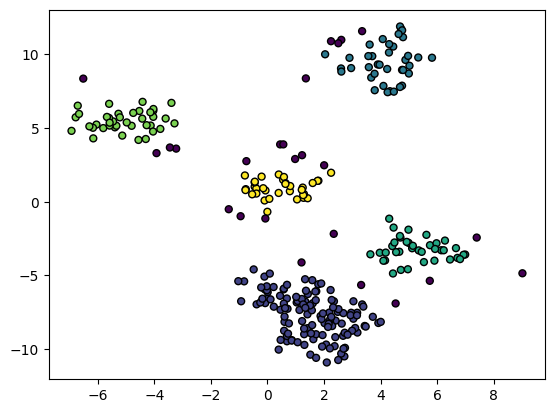

In [304]:
plt.scatter(X4[:, 0], X4[:, 1], c=best_dbscan_model_4.labels_, edgecolors="k", s=25)
plt.show()

In [305]:
print(f"Silhouette score: {round(silhouette_score(X4, best_dbscan_model_4.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X4, best_dbscan_model_4.labels_), 2)}")

Silhouette score: 0.59
Davies Bouldin score: 2.03


In [320]:
dbscan_4 = DBSCAN(eps=1.3).fit(X4)

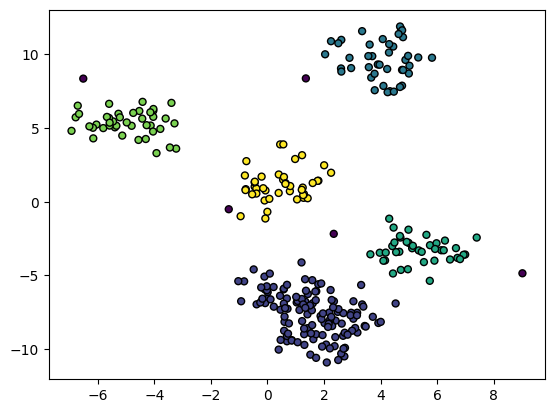

In [321]:
plt.scatter(X4[:, 0], X4[:, 1], c=dbscan_4.labels_, edgecolors="k", s=25)
plt.show()

Видим, что данная модель лучше разделяет данные, хотя и метрика меньше

In [327]:
dbscan_4_scores = [
    round(silhouette_score(X4, dbscan_4.labels_), 2),
    round(davies_bouldin_score(X4, dbscan_4.labels_), 2)
]

In [328]:
print(f"Silhouette score: {dbscan_4_scores[0]}")
print(f"Davies Bouldin score: {dbscan_4_scores[1]}")

Silhouette score: 0.66
Davies Bouldin score: 3.87


# Пятый датасет

In [329]:
best_dbscan_model_5 = search_best_dbscan_model(X5)

Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 3}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 4}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 5}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 6}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 7}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 8}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 9}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах

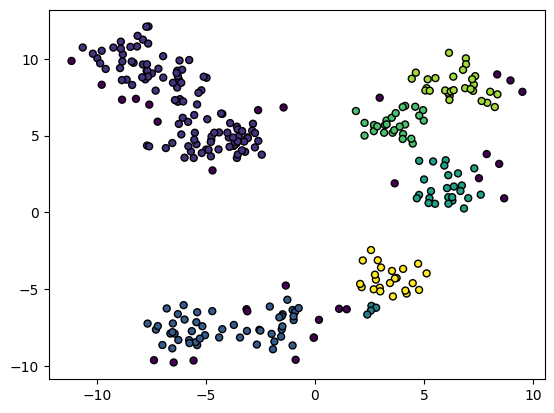

In [330]:
plt.scatter(X5[:, 0], X5[:, 1], c=best_dbscan_model_5.labels_, edgecolors="k", s=25)
plt.show()

In [331]:
print(f"Silhouette score: {round(silhouette_score(X5, best_dbscan_model_5.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X5, best_dbscan_model_5.labels_), 2)}")

Silhouette score: 0.43
Davies Bouldin score: 1.39


In [334]:
dbscan_5 = DBSCAN(eps=1).fit(X5)

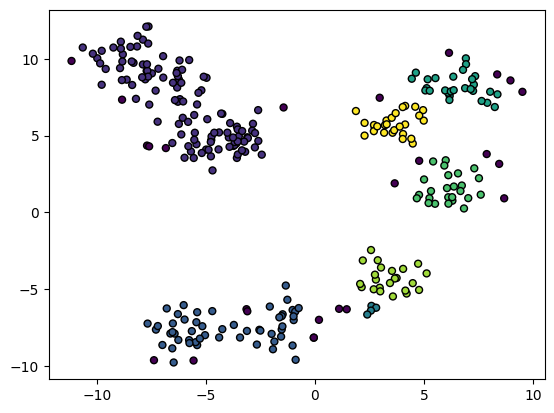

In [336]:
plt.scatter(X5[:, 0], X5[:, 1], c=dbscan_5.labels_, edgecolors="k", s=25)
plt.show()

Видим, что данная модель лучше разделяет данные, хотя и метрика меньше

In [339]:
dbscan_5_scores = [
    round(silhouette_score(X5, dbscan_5.labels_), 2),
    round(davies_bouldin_score(X5, dbscan_5.labels_), 2)
]

In [340]:
print(f"Silhouette score: {dbscan_5_scores[0]}")
print(f"Davies Bouldin score: {dbscan_5_scores[1]}")

Silhouette score: 0.45
Davies Bouldin score: 1.46


# Шестой датасет

In [34]:
from sklearn.model_selection import ParameterGrid

In [35]:
best_dbscan_model_6 = search_best_dbscan_model(X6)

Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 8}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l1', 'min_samples': 9}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l2', 'min_samples': 8}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.1, 'metric': 'l2', 'min_samples': 9}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.2, 'metric': 'l1', 'min_samples': 8}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.2, 'metric': 'l1', 'min_samples': 9}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах {'eps': 0.2, 'metric': 'l2', 'min_samples': 8}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Ошибка на параметрах

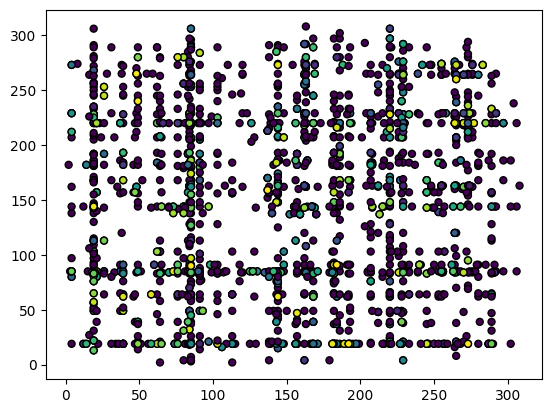

In [36]:
plt.scatter(X6[:, 0], X6[:, 1], c=best_dbscan_model_6.labels_, edgecolors="k", s=25)
plt.show()

In [37]:
print(f"Rand Index: {round(rand_score(y6, best_dbscan_model_6.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y6, best_dbscan_model_6.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X6, best_dbscan_model_6.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X6, best_dbscan_model_6.labels_), 2)}")

Rand Index: 0.41
Fowlkes Mallows Score: 0.34
Silhouette score: 0.14
Davies Bouldin score: 1.39


In [38]:
dbscan_6 = DBSCAN(eps=1).fit(X6)

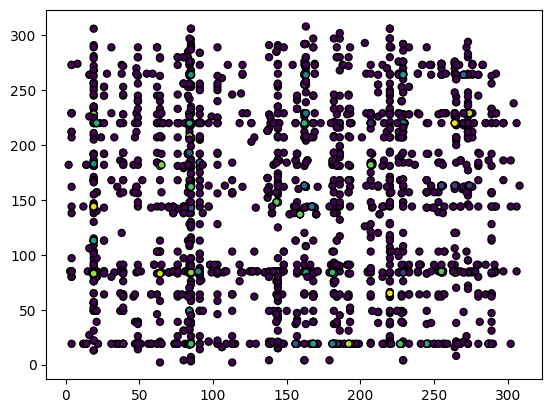

In [39]:
plt.scatter(X6[:, 0], X6[:, 1], c=dbscan_6.labels_, edgecolors="k", s=25)
plt.show()

Данные слишком плохие

In [40]:
dbscan_6_scores = [
    round(rand_score(y6, best_dbscan_model_6.labels_), 2),
    round(fowlkes_mallows_score(y6, best_dbscan_model_6.labels_), 2),
    round(silhouette_score(X6, best_dbscan_model_6.labels_), 2),
    round(davies_bouldin_score(X6, best_dbscan_model_6.labels_), 2)
]

In [41]:
print(f"Rand Index: {dbscan_6_scores[0]}")
print(f"Fowlkes Mallows Score: {dbscan_6_scores[1]}")
print(f"Silhouette score: {dbscan_6_scores[2]}")
print(f"Davies Bouldin score: {dbscan_6_scores[3]}")

Rand Index: 0.41
Fowlkes Mallows Score: 0.34
Silhouette score: 0.14
Davies Bouldin score: 1.39


In [42]:
dbscan_6_cl = pd.concat([pd.DataFrame(X6), pd.DataFrame(y6)], axis=1)

In [43]:
dbscan_6_cl

0    1  0
0     144   58  0
1      84  218  0
2     265  204  1
3     229  218  1
4     162  226  0
...   ...  ... ..
1995   19   83  0
1996   19  113  1
1997  220   65  0
1998  192   19  0
1999  144   80  0

[2000 rows x 3 columns]

In [44]:
dbscan_6_cl.columns = ["AiportFrom", "AirportTo", "y_true"]

In [45]:
dbscan_6_cl.head()

AiportFrom  AirportTo  y_true
0         144         58       0
1          84        218       0
2         265        204       1
3         229        218       1
4         162        226       0

In [46]:
dbscan_6_cl["Cluster_id"] = best_dbscan_model_6.labels_

In [47]:
dbscan_6_cl.head()

AiportFrom  AirportTo  y_true  Cluster_id
0         144         58       0          -1
1          84        218       0           0
2         265        204       1          -1
3         229        218       1           1
4         162        226       0          -1

In [48]:
dbscan_6_cl.groupby('Cluster_id').apply(lambda x: x.mode().iloc[0])

0           AiportFrom  AirportTo  y_true  Cluster_id
Cluster_id                                           
-1                19.0       19.0     0.0        -1.0
 0                84.0      218.0     0.0         0.0
 1               229.0      218.0     0.0         1.0
 2                19.0      256.0     0.0         2.0
 3                62.0      289.0     0.0         3.0
...                ...        ...     ...         ...
 438             192.0       19.0     0.0       438.0
 439              19.0       81.0     0.0       439.0
 440             273.0       19.0     0.0       440.0
 441             137.0      159.0     0.0       441.0
 442             184.0       91.0     0.0       442.0

[444 rows x 4 columns]

# EM-алгоритм

In [49]:
from sklearn.mixture import GaussianMixture

In [50]:
gm_params = {
    "n_components": np.arange(1, 10, 1)
}

In [51]:
def search_best_gm_model(dataset):
    best_score = -1
    best_params = None
    best_model = None
    for params in ParameterGrid(gm_params):
        try:
            model = GaussianMixture(
                n_components=params["n_components"],
            )
            labels = model.fit_predict(dataset)
            score = silhouette_score(dataset, labels)
            if score > best_score:
                best_score = score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Ошибка на параметрах {params}: {e}")

    print("Лучшая модель по подбору гиперпараметров:")
    print(best_params)
    return best_model

# Первый датасет

In [366]:
best_gm_model_1 = search_best_gm_model(X1)

Ошибка на параметрах {'n_components': 1}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Лучшая модель по подбору гиперпараметров:
{'n_components': 4}


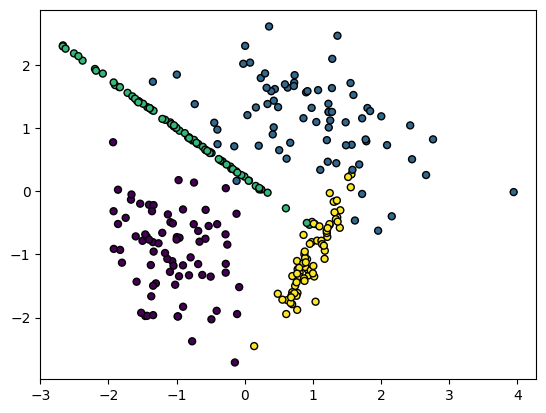

In [367]:
plt.scatter(X1[:, 0], X1[:, 1], c=best_gm_model_1.predict(X1), edgecolors="k", s=25)
plt.show()

In [369]:
gm_1_predict = best_gm_model_1.predict(X1)
print(f"Rand Index: {round(rand_score(y1, gm_1_predict), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y1, gm_1_predict), 2)}")
print(f"Silhouette score: {round(silhouette_score(X1, gm_1_predict), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X1, gm_1_predict), 2)}")

Rand Index: 0.74
Fowlkes Mallows Score: 0.7
Silhouette score: 0.42
Davies Bouldin score: 0.86


Видим, что данная модель отлично разделяет данные

In [370]:
gm_1_scores = [
    round(rand_score(y1, gm_1_predict), 2),
    round(fowlkes_mallows_score(y1, gm_1_predict), 2),
    round(silhouette_score(X1, gm_1_predict), 2),
    round(davies_bouldin_score(X1, gm_1_predict), 2)
]

In [420]:
df_gm_1 = pd.concat([pd.DataFrame(X1), pd.DataFrame(y1), pd.DataFrame(gm_1_predict)], axis=1)

In [421]:
df_gm_1.columns = ["x1", "x2", "True",  "Cluster"]

In [422]:
df_gm_1.head(5)

x1        x2  True  Cluster
0 -0.405177 -0.518846     0        0
1 -0.489374 -2.028352     0        0
2  1.205500  0.814090     1        1
3  0.862709 -0.689340     1        3
4  1.556337  0.066753     1        3

# Второй датасет

In [397]:
best_gm_model_2 = search_best_gm_model(X2)

Ошибка на параметрах {'n_components': 1}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Лучшая модель по подбору гиперпараметров:
{'n_components': 7}


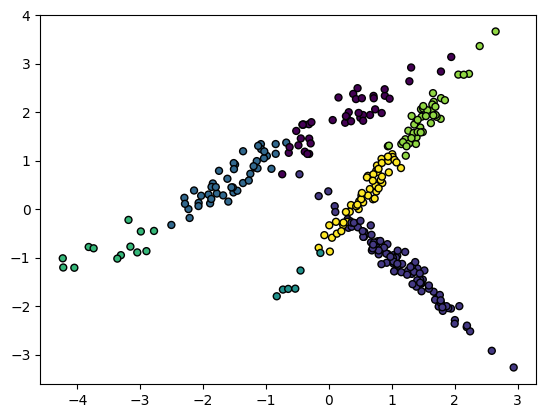

In [398]:
plt.scatter(X2[:, 0], X2[:, 1], c=best_gm_model_2.predict(X2), edgecolors="k", s=25)
plt.show()

In [399]:
gm_2_predict = best_gm_model_2.predict(X2)
print(f"Rand Index: {round(rand_score(y2, gm_2_predict), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y2, gm_2_predict), 2)}")
print(f"Silhouette score: {round(silhouette_score(X2, gm_2_predict), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X2, gm_2_predict), 2)}")

Rand Index: 0.2
Fowlkes Mallows Score: 0.45
Silhouette score: 0.41
Davies Bouldin score: 0.72


In [400]:
gm_2 = GaussianMixture(n_components=3).fit(X2)

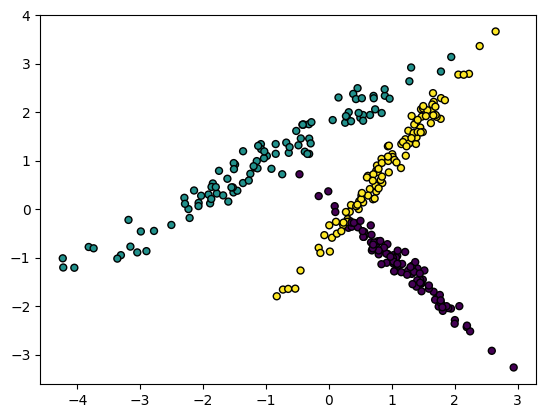

In [401]:
plt.scatter(X2[:, 0], X2[:, 1], c=gm_2.predict(X2), edgecolors="k", s=25)
plt.show()

Видим, что данная модель отлично разделяет данные

In [402]:
gm_2_best_predict = gm_2.predict(X2)
gm_2_scores = [
    round(rand_score(y2, gm_2_best_predict), 2),
    round(fowlkes_mallows_score(y2, gm_2_best_predict), 2),
    round(silhouette_score(X2, gm_2_best_predict), 2),
    round(davies_bouldin_score(X2, gm_2_best_predict), 2)
]

In [403]:
print(f"Rand Index: {gm_2_scores[0]}")
print(f"Fowlkes Mallows Score: {gm_2_scores[1]}")
print(f"Silhouette score: {gm_2_scores[2]}")
print(f"Davies Bouldin score: {gm_2_scores[3]}")

Rand Index: 0.33
Fowlkes Mallows Score: 0.58
Silhouette score: 0.34
Davies Bouldin score: 1.13


In [417]:
df_gm_2 = pd.concat([pd.DataFrame(X2), pd.DataFrame(y2), pd.DataFrame(gm_2_best_predict)], axis=1)

In [418]:
df_gm_2.columns = ["x1", "x2", "True",  "Cluster"]

In [419]:
df_gm_2.head(5)

x1        x2  True  Cluster
0 -0.008778  0.370369     0        0
1  1.518698 -1.261123     0        0
2 -2.213519 -0.178409     0        1
3  1.465083  2.063991     0        2
4  0.299203 -0.203750     0        2

# Третий датасет

In [425]:
best_gm_model_3 = search_best_gm_model(X3)

Ошибка на параметрах {'n_components': 1}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Лучшая модель по подбору гиперпараметров:
{'n_components': 2}


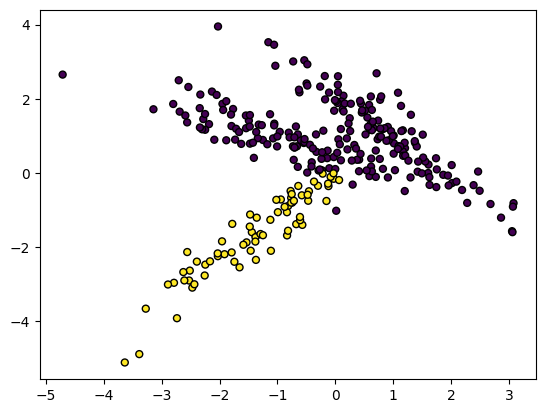

In [426]:
plt.scatter(X3[:, 0], X3[:, 1], c=best_gm_model_3.predict(X3), edgecolors="k", s=25)
plt.show()

In [406]:
gm_3_predict = best_gm_model_3.predict(X3)
print(f"Rand Index: {round(rand_score(y3, gm_3_predict), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y3, gm_3_predict), 2)}")
print(f"Silhouette score: {round(silhouette_score(X3, gm_3_predict), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X3, gm_3_predict), 2)}")

Rand Index: 0.61
Fowlkes Mallows Score: 0.62
Silhouette score: 0.42
Davies Bouldin score: 0.88


In [407]:
gm_3 = GaussianMixture(n_components=3).fit(X3)

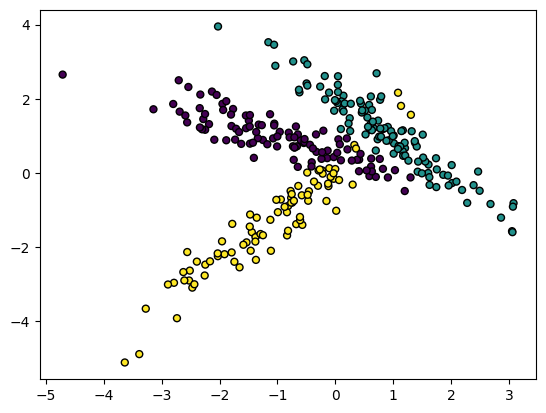

In [408]:
plt.scatter(X3[:, 0], X3[:, 1], c=gm_3.predict(X3), edgecolors="k", s=25)
plt.show()

Видим, что данная модель отлично разделяет данные

In [409]:
gm_3_best_predict = gm_3.predict(X3)
gm_3_scores = [
    round(rand_score(y3, gm_3_best_predict), 2),
    round(fowlkes_mallows_score(y3, gm_3_best_predict), 2),
    round(silhouette_score(X3, gm_3_best_predict), 2),
    round(davies_bouldin_score(X3, gm_3_best_predict), 2)
]

In [410]:
print(f"Rand Index: {gm_3_scores[0]}")
print(f"Fowlkes Mallows Score: {gm_3_scores[1]}")
print(f"Silhouette score: {gm_3_scores[2]}")
print(f"Davies Bouldin score: {gm_3_scores[3]}")

Rand Index: 0.88
Fowlkes Mallows Score: 0.83
Silhouette score: 0.29
Davies Bouldin score: 1.18


In [411]:
df_gm_3 = pd.concat([pd.DataFrame(X3), pd.DataFrame(y3), pd.DataFrame(gm_3_best_predict)], axis=1)

In [413]:
df_gm_3.columns = ["x1", "x2", "True",  "Cluster"]

In [416]:
df_gm_3.head(5)

x1        x2  True  Cluster
0  1.011205  0.799172     0        1
1  0.618930  0.389110     1        0
2 -2.027160  3.949443     0        1
3 -0.140783  0.401343     2        0
4 -1.252705  0.890957     1        0

# Четвёртый датасет

In [423]:
best_gm_model_4 = search_best_gm_model(X4)

Ошибка на параметрах {'n_components': 1}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Лучшая модель по подбору гиперпараметров:
{'n_components': 5}


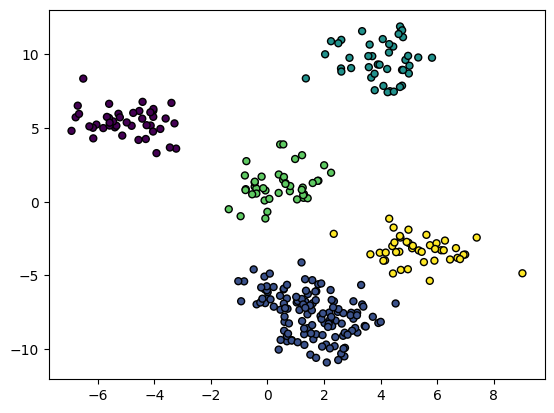

In [424]:
plt.scatter(X4[:, 0], X4[:, 1], c=best_gm_model_4.predict(X4), edgecolors="k", s=25)
plt.show()

In [430]:
gm_4_predict = best_gm_model_4.predict(X4)
print(f"Silhouette score: {round(silhouette_score(X4, gm_4_predict), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X4, gm_4_predict), 2)}")

Silhouette score: 0.67
Davies Bouldin score: 0.41


Видим, что данная модель отлично разделяет данные

In [431]:
gm_4_best_predict = gm_4_predict
gm_4_scores = [
    round(silhouette_score(X4, gm_4_best_predict), 2),
    round(davies_bouldin_score(X4, gm_4_best_predict), 2)
]

In [432]:
df_gm_4 = pd.concat([pd.DataFrame(X4), pd.DataFrame(gm_4_best_predict)], axis=1)

In [433]:
df_gm_4.columns = ["x1", "x2", "Cluster"]

In [436]:
df_gm_4.head(5)

x1         x2  Cluster
0  1.451879  -8.638007        1
1  1.797201  -5.606890        1
2 -0.824050  -5.406772        1
3  2.098123 -10.914624        1
4  0.862215  -9.398835        1

# Пятый датасет

In [437]:
best_gm_model_5 = search_best_gm_model(X5)

Ошибка на параметрах {'n_components': 1}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Лучшая модель по подбору гиперпараметров:
{'n_components': 3}


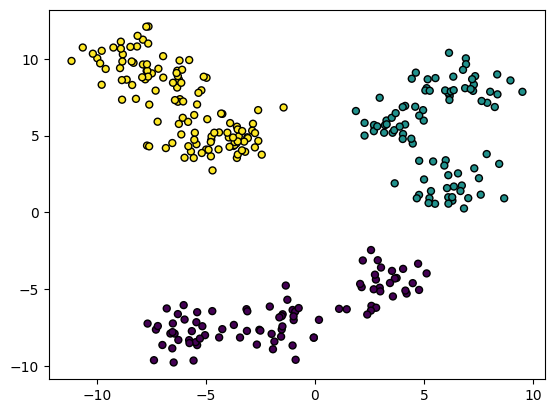

In [438]:
plt.scatter(X5[:, 0], X5[:, 1], c=best_gm_model_5.predict(X5), edgecolors="k", s=25)
plt.show()

In [440]:
gm_5_predict = best_gm_model_5.predict(X5)
print(f"Silhouette score: {round(silhouette_score(X5, gm_5_predict), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X5, gm_5_predict), 2)}")

Silhouette score: 0.64
Davies Bouldin score: 0.52


Видим, что данная модель отлично разделяет данные

In [441]:
gm_5_best_predict = gm_5_predict
gm_5_scores = [
    round(silhouette_score(X5, gm_5_best_predict), 2),
    round(davies_bouldin_score(X5, gm_5_best_predict), 2)
]

In [442]:
df_gm_5 = pd.concat([pd.DataFrame(X5), pd.DataFrame(gm_5_best_predict)], axis=1)

In [443]:
df_gm_5.columns = ["x1", "x2", "Cluster"]

In [444]:
df_gm_5.head(5)

x1        x2  Cluster
0 -7.696013  4.351636        2
1 -2.595782  4.655135        2
2 -2.547757 -7.633767        0
3  2.717626 -6.198393        0
4 -1.552307 -8.079397        0

# Шестой датасет

In [52]:
best_gm_model_6 = search_best_gm_model(X6)

Ошибка на параметрах {'n_components': 1}: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Лучшая модель по подбору гиперпараметров:
{'n_components': 4}


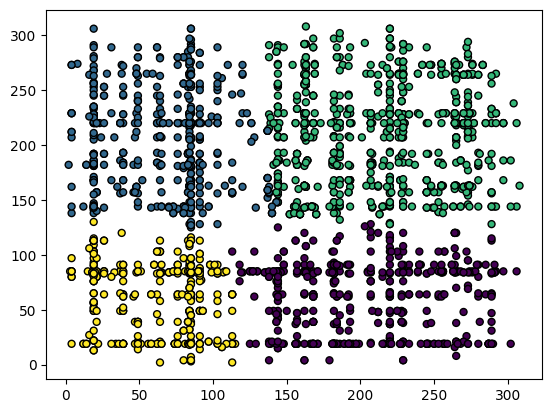

In [53]:
plt.scatter(X6[:, 0], X6[:, 1], c=best_gm_model_6.predict(X6), edgecolors="k", s=25)
plt.show()

In [54]:
gm_6_predict = best_gm_model_6.predict(X6)
print(f"Rand Index: {round(rand_score(y6, gm_6_predict), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y6, gm_6_predict), 2)}")
print(f"Silhouette score: {round(silhouette_score(X6, gm_6_predict), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X6, gm_6_predict), 2)}")

Rand Index: 0.43
Fowlkes Mallows Score: 0.41
Silhouette score: 0.43
Davies Bouldin score: 0.74


Видим, что данная модель непонятно разделяет данные

In [55]:
gm_6_best_predict = gm_6_predict
gm_6_scores = [
    round(rand_score(y6, gm_6_best_predict), 2),
    round(fowlkes_mallows_score(y6, gm_6_best_predict), 2),
    round(silhouette_score(X6, gm_6_best_predict), 2),
    round(davies_bouldin_score(X6, gm_6_best_predict), 2)
]

In [56]:
df_gm_6 = pd.concat([pd.DataFrame(X6), pd.DataFrame(y6), pd.DataFrame(gm_6_best_predict)], axis=1)

In [57]:
df_gm_6.columns = ["x1", "x2", "True", "Cluster"]

In [58]:
df_gm_6.head(5)

x1   x2  True  Cluster
0  144   58     0        0
1   84  218     0        1
2  265  204     1        2
3  229  218     1        2
4  162  226     0        2

In [60]:
df_gm_6.groupby('Cluster').apply(lambda x: x.mode().iloc[0])

0         x1   x2  True  Cluster
Cluster                         
0        220   19     0        0
1         85  220     0        1
2        220  220     0        2
3         19   19     0        3

# Affinity Propogation

In [61]:
from sklearn.cluster import AffinityPropagation

In [62]:
ap_params = {
    "damping": np.arange(0.5, 0.9, 0.1),
}

In [63]:
def search_best_ap_model(dataset):
    best_score = -1
    best_params = None
    best_model = None
    for params in ParameterGrid(ap_params):
        try:
            model = AffinityPropagation(
                damping=params["damping"],
            )
            labels = model.fit_predict(dataset)
            score = silhouette_score(dataset, labels)
            if score > best_score:
                best_score = score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Ошибка на параметрах {params}: {e}")

    print("Лучшая модель по подбору гиперпараметров:")
    print(best_params)
    return best_model

# Первый датасет

In [453]:
best_ap_model_1 = search_best_ap_model(X1)

Лучшая модель по подбору гиперпараметров:
{'damping': 0.7999999999999999}


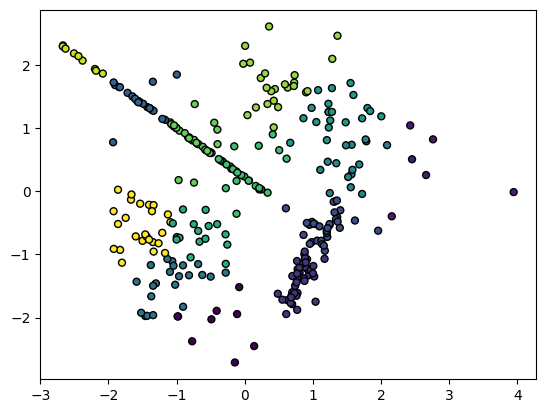

In [454]:
plt.scatter(X1[:, 0], X1[:, 1], c=best_ap_model_1.labels_, edgecolors="k", s=25)
plt.show()

In [455]:
print(f"Rand Index: {round(rand_score(y1, best_ap_model_1.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y1, best_ap_model_1.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X1, best_ap_model_1.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X1, best_ap_model_1.labels_), 2)}")

Rand Index: 0.57
Fowlkes Mallows Score: 0.36
Silhouette score: 0.44
Davies Bouldin score: 0.74


In [466]:
ap_1 = best_ap_model_1

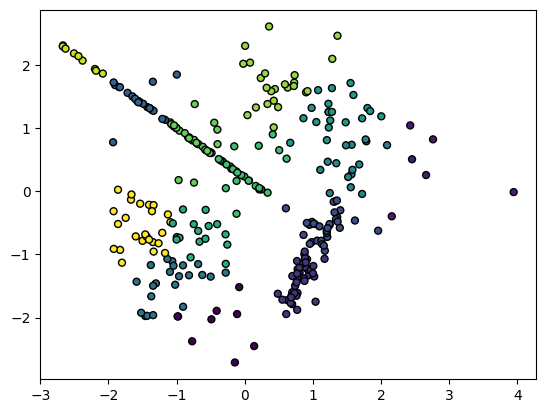

In [467]:
plt.scatter(X1[:, 0], X1[:, 1], c=ap_1.labels_, edgecolors="k", s=25)
plt.show()

Алгоритм плохо разделяет данные

In [468]:
ap_1_scores = [
    round(rand_score(y1, ap_1.labels_), 2),
    round(fowlkes_mallows_score(y1, ap_1.labels_), 2),
    round(silhouette_score(X1, ap_1.labels_), 2),
    round(davies_bouldin_score(X1, ap_1.labels_), 2)
]

# Второй датасет

In [470]:
best_ap_model_2 = search_best_ap_model(X2)

Лучшая модель по подбору гиперпараметров:
{'damping': 0.7}


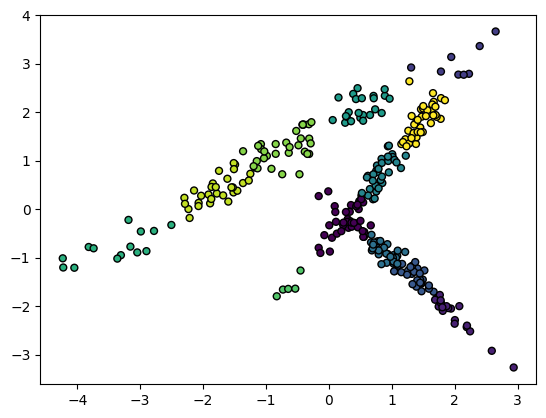

In [471]:
plt.scatter(X2[:, 0], X2[:, 1], c=best_ap_model_2.labels_, edgecolors="k", s=25)
plt.show()

In [472]:
print(f"Rand Index: {round(rand_score(y2, best_ap_model_2.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y2, best_ap_model_2.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X2, best_ap_model_2.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X2, best_ap_model_2.labels_), 2)}")

Rand Index: 0.1
Fowlkes Mallows Score: 0.31
Silhouette score: 0.5
Davies Bouldin score: 0.56


In [486]:
ap_2 = best_ap_model_2

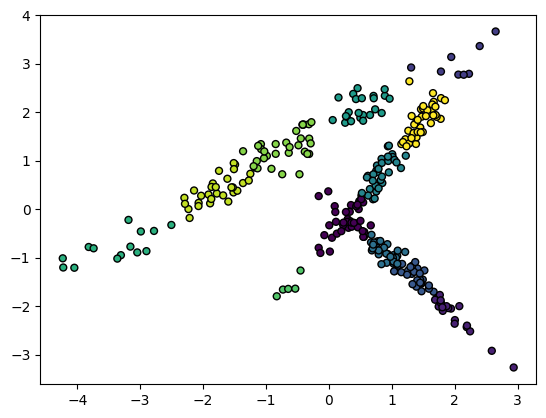

In [487]:
plt.scatter(X2[:, 0], X2[:, 1], c=ap_2.labels_, edgecolors="k", s=25)
plt.show()

Алгоритм плохо разделяет данные

In [488]:
ap_2_scores = [
    round(rand_score(y2, ap_2.labels_), 2),
    round(fowlkes_mallows_score(y2, ap_2.labels_), 2),
    round(silhouette_score(X2, ap_2.labels_), 2),
    round(davies_bouldin_score(X2, ap_2.labels_), 2)
]

# Третий датасет

In [490]:
best_ap_model_3 = search_best_ap_model(X3)

Лучшая модель по подбору гиперпараметров:
{'damping': 0.7999999999999999}


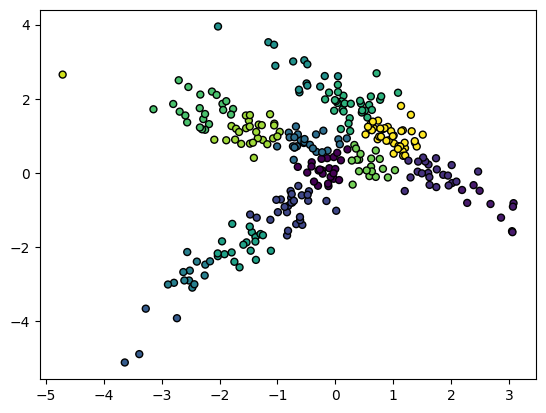

In [491]:
plt.scatter(X3[:, 0], X3[:, 1], c=best_ap_model_3.labels_, edgecolors="k", s=25)
plt.show()

In [492]:
print(f"Rand Index: {round(rand_score(y3, best_ap_model_3.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y3, best_ap_model_3.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X3, best_ap_model_3.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X3, best_ap_model_3.labels_), 2)}")

Rand Index: 0.72
Fowlkes Mallows Score: 0.4
Silhouette score: 0.41
Davies Bouldin score: 0.66


In [493]:
ap_3 = best_ap_model_3

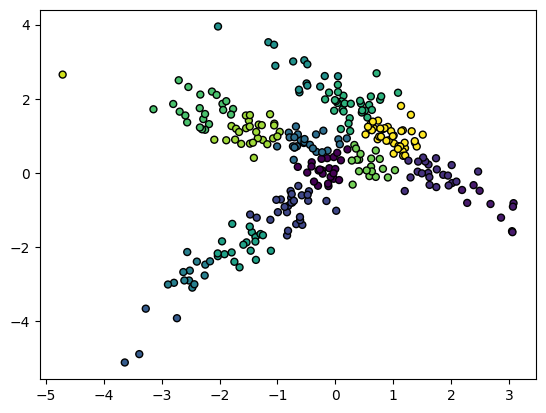

In [494]:
plt.scatter(X3[:, 0], X3[:, 1], c=ap_3.labels_, edgecolors="k", s=25)
plt.show()

Алгоритм плохо разделяет данные

In [495]:
ap_3_scores = [
    round(rand_score(y3, ap_3.labels_), 2),
    round(fowlkes_mallows_score(y3, ap_3.labels_), 2),
    round(silhouette_score(X3, ap_3.labels_), 2),
    round(davies_bouldin_score(X3, ap_3.labels_), 2)
]

# Четвёртый датасет

In [497]:
best_ap_model_4 = search_best_ap_model(X4)

Лучшая модель по подбору гиперпараметров:
{'damping': 0.7}


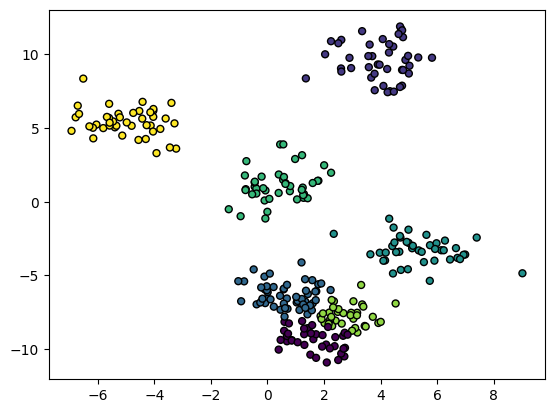

In [498]:
plt.scatter(X4[:, 0], X4[:, 1], c=best_ap_model_4.labels_, edgecolors="k", s=25)
plt.show()

In [501]:
print(f"Silhouette score: {round(silhouette_score(X4, best_ap_model_4.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X4, best_ap_model_4.labels_), 2)}")

Silhouette score: 0.59
Davies Bouldin score: 0.57


In [518]:
ap_4 = best_ap_model_4

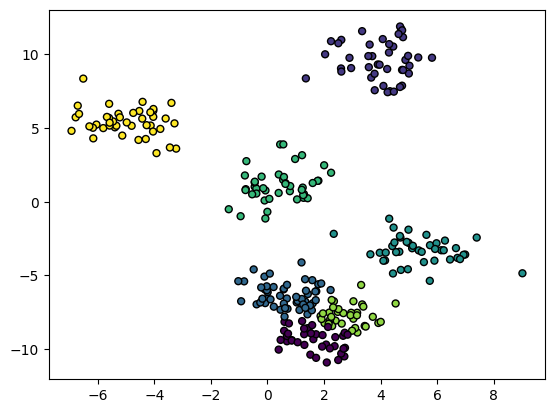

In [519]:
plt.scatter(X4[:, 0], X4[:, 1], c=ap_4.labels_, edgecolors="k", s=25)
plt.show()

Алгоритм неплохо разделяет данные

In [520]:
ap_4_scores = [
    round(silhouette_score(X4, ap_4.labels_), 2),
    round(davies_bouldin_score(X4, ap_4.labels_), 2)
]

# Пятый датасет

In [523]:
best_ap_model_5 = search_best_ap_model(X5)

Лучшая модель по подбору гиперпараметров:
{'damping': 0.7}


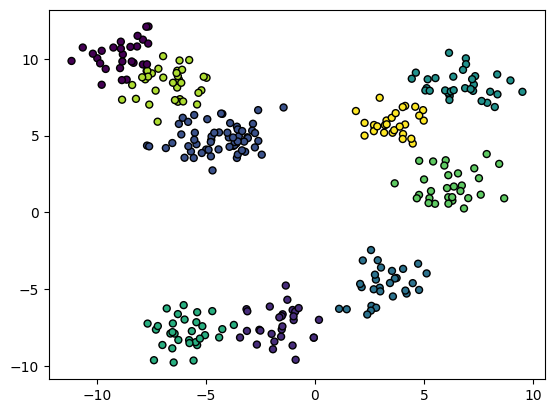

In [524]:
plt.scatter(X5[:, 0], X5[:, 1], c=best_ap_model_5.labels_, edgecolors="k", s=25)
plt.show()

In [525]:
print(f"Silhouette score: {round(silhouette_score(X5, best_ap_model_5.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X5, best_ap_model_5.labels_), 2)}")

Silhouette score: 0.54
Davies Bouldin score: 0.63


In [527]:
ap_5 = best_ap_model_5

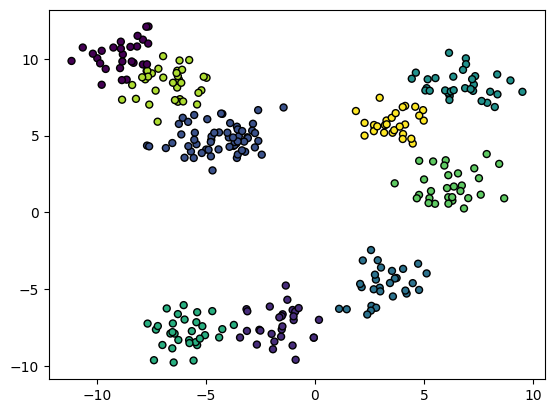

In [528]:
plt.scatter(X5[:, 0], X5[:, 1], c=ap_5.labels_, edgecolors="k", s=25)
plt.show()

Алгоритм отлично разделяет данные

In [529]:
ap_5_scores = [
    round(silhouette_score(X5, ap_5.labels_), 2),
    round(davies_bouldin_score(X5, ap_5.labels_), 2)
]

# Шестой датасет

In [64]:
best_ap_model_6 = search_best_ap_model(X6)

D:\MachineLearning\venv\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Лучшая модель по подбору гиперпараметров:
{'damping': 0.7999999999999999}


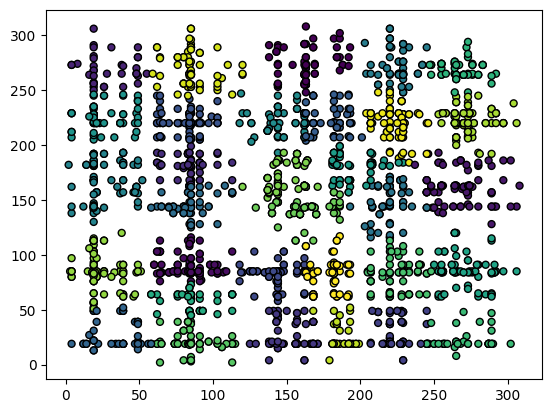

In [65]:
plt.scatter(X6[:, 0], X6[:, 1], c=best_ap_model_6.labels_, edgecolors="k", s=25)
plt.show()

In [66]:
print(f"Rand Index: {round(rand_score(y6, best_ap_model_6.labels_), 2)}")
print(f"Fowlkes Mallows Score: {round(fowlkes_mallows_score(y6, best_ap_model_6.labels_), 2)}")
print(f"Silhouette score: {round(silhouette_score(X6, best_ap_model_6.labels_), 2)}")
print(f"Davies Bouldin score: {round(davies_bouldin_score(X6, best_ap_model_6.labels_), 2)}")

Rand Index: 0.37
Fowlkes Mallows Score: 0.14
Silhouette score: 0.44
Davies Bouldin score: 0.74


In [67]:
ap_6 = best_ap_model_6

Алгоритм неплохо разделяет данные

In [68]:
ap_6_scores = [
    round(rand_score(y6, ap_6.labels_), 2),
    round(fowlkes_mallows_score(y6, ap_6.labels_), 2),
    round(silhouette_score(X6, ap_6.labels_), 2),
    round(davies_bouldin_score(X6, ap_6.labels_), 2)
]

In [69]:
ap_6_cl = pd.concat([pd.DataFrame(X6), pd.DataFrame(y6)], axis=1)

In [70]:
ap_6_cl.columns = ["AiportFrom", "AirportTo", "y_true"]

In [71]:
ap_6_cl.head()

AiportFrom  AirportTo  y_true
0         144         58       0
1          84        218       0
2         265        204       1
3         229        218       1
4         162        226       0

In [72]:
ap_6_cl["Cluster_id"] = ap_6.labels_

In [73]:
ap_6_cl.head()

AiportFrom  AirportTo  y_true  Cluster_id
0         144         58       0           7
1          84        218       0           8
2         265        204       1          27
3         229        218       1          30
4         162        226       0          15

In [75]:
ap_6_cl.groupby('Cluster_id').apply(lambda x: x.mode().iloc[0])

0           AiportFrom  AirportTo  y_true  Cluster_id
Cluster_id                                           
0                163.0      273.0     0.0         0.0
1                 85.0       85.0     0.0         1.0
2                255.0      163.0     0.0         2.0
3                 19.0      265.0     0.0         3.0
4                 85.0      192.0     0.0         4.0
5                144.0       19.0     0.0         5.0
6                220.0       19.0     0.0         6.0
7                144.0       85.0     0.0         7.0
8                 84.0      220.0     0.0         8.0
9                163.0      220.0     0.0         9.0
10                49.0       19.0     0.0        10.0
11                85.0      144.0     0.0        11.0
12               220.0      144.0     0.0        12.0
13               229.0      265.0     0.0        13.0
14                19.0      182.0     0.0        14.0
15               144.0      220.0     0.0        15.0
16                19.0      220.0     0.0        16.0
17               186.0      168.0     0.0        17.0
18               255.0       85.0     0.0        18.0
19                85.0       64.0     0.0        19.0
20               264.0      264.0     0.0        20.0
21               287.0       19.0     0.0        21.0
22               220.0       84.0     0.0        22.0
23                85.0       19.0     0.0        23.0
24               182.0      144.0     0.0        24.0
25               144.0      162.0     0.0        25.0
26                19.0       85.0     0.0        26.0
27               273.0      220.0     0.0        27.0
28               182.0       19.0     0.0        28.0
29                85.0      265.0     0.0        29.0
30               220.0      220.0     0.0        30.0
31               182.0       84.0     0.0        31.0

# Результаты 

## 1 датаесет

In [595]:
data = {
    ("", "Алгоритм ML"): ["k-means", "Иерархическая кластеризация", "DBSCAN", "EM-алгоритм", "Affinity Propogation"],
    ("Внутренние метрики", "Silhouette score"): [k_means_1_scores[0], hierarchy_1_scores[0], dbscan_1_scores[0], gm_1_scores[0], ap_1_scores[0]],
    ("Внутренние метрики", "Davies Bouldin score"): [k_means_1_scores[1], hierarchy_1_scores[1], dbscan_1_scores[1], gm_1_scores[1], ap_1_scores[1]],
    ("Внешние метрики", "Rand Index"): [k_means_1_scores[2], hierarchy_1_scores[2], dbscan_1_scores[2], gm_1_scores[2], ap_1_scores[2]],
    ("Внешние метрики", "Fowlkes Mallows Score"): [k_means_1_scores[3], hierarchy_1_scores[3], dbscan_1_scores[3], gm_1_scores[3], ap_1_scores[3]]
}

df = pd.DataFrame(data)

# Устанавливаем многоуровневый заголовок
df.columns = pd.MultiIndex.from_tuples(df.columns)
df

Внутренние метрики                       \
                   Алгоритм ML   Silhouette score Davies Bouldin score   
0                      k-means               0.69                 0.62   
1  Иерархическая кластеризация               0.69                 0.62   
2                       DBSCAN               0.60                 0.62   
3                  EM-алгоритм               0.54                 0.46   
4         Affinity Propogation               0.57                 0.36   

  Внешние метрики                        
       Rand Index Fowlkes Mallows Score  
0            0.48                  0.71  
1            0.46                  0.75  
2            0.22                  4.08  
3            0.16                  8.27  
4            0.44                  0.74

## 2 датаесет

In [596]:
data = {
    ("", "Алгоритм ML"): ["k-means", "Иерархическая кластеризация", "DBSCAN", "EM-алгоритм", "Affinity Propogation"],
    ("Внутренние метрики", "Silhouette score"): [k_means_2_scores[0], hierarchy_2_scores[0], dbscan_2_scores[0], gm_2_scores[0], ap_2_scores[0]],
    ("Внутренние метрики", "Davies Bouldin score"): [k_means_2_scores[1], hierarchy_2_scores[1], dbscan_2_scores[1], gm_2_scores[1], ap_2_scores[1]],
    ("Внешние метрики", "Rand Index"): [k_means_2_scores[2], hierarchy_2_scores[2], dbscan_2_scores[2], gm_2_scores[2], ap_2_scores[2]],
    ("Внешние метрики", "Fowlkes Mallows Score"): [k_means_2_scores[3], hierarchy_2_scores[3], dbscan_2_scores[3], gm_2_scores[3], ap_2_scores[3]]
}

df = pd.DataFrame(data)

# Устанавливаем многоуровневый заголовок
df.columns = pd.MultiIndex.from_tuples(df.columns)
df

Внутренние метрики                       \
                   Алгоритм ML   Silhouette score Davies Bouldin score   
0                      k-means               0.36                 0.60   
1  Иерархическая кластеризация               0.35                 0.59   
2                       DBSCAN               0.47                 0.69   
3                  EM-алгоритм               0.33                 0.58   
4         Affinity Propogation               0.10                 0.31   

  Внешние метрики                        
       Rand Index Fowlkes Mallows Score  
0            0.52                  0.64  
1            0.52                  0.65  
2            0.14                  2.86  
3            0.34                  1.13  
4            0.50                  0.56

## 3 датаесет

In [601]:
data = {
    ("", "Алгоритм ML"): ["k-means", "Иерархическая кластеризация", "DBSCAN", "EM-алгоритм", "Affinity Propogation"],
    ("Внутренние метрики", "Silhouette score"): [k_means_3_scores[0], hierarchy_3_scores[0], dbscan_3_scores[0], gm_3_scores[0], ap_3_scores[0]],
    ("Внутренние метрики", "Davies Bouldin score"): [k_means_3_scores[1], hierarchy_3_scores[1], dbscan_3_scores[1], gm_3_scores[1], ap_3_scores[1]],
    ("Внешние метрики", "Rand Index"): [k_means_3_scores[2], hierarchy_3_scores[2], dbscan_3_scores[2], gm_3_scores[2], ap_3_scores[2]],
    ("Внешние метрики", "Fowlkes Mallows Score"): [k_means_3_scores[3], hierarchy_3_scores[3], dbscan_3_scores[3], gm_3_scores[3], ap_3_scores[3]]
}

df = pd.DataFrame(data)

# Устанавливаем многоуровневый заголовок
df.columns = pd.MultiIndex.from_tuples(df.columns)
df

Внутренние метрики                       \
                   Алгоритм ML   Silhouette score Davies Bouldin score   
0                      k-means               0.67                 0.53   
1  Иерархическая кластеризация               0.61                 0.47   
2                       DBSCAN               0.34                 0.57   
3                  EM-алгоритм               0.88                 0.83   
4         Affinity Propogation               0.72                 0.40   

  Внешние метрики                        
       Rand Index Fowlkes Mallows Score  
0            0.43                  0.81  
1            0.38                  0.89  
2            0.55                  1.75  
3            0.29                  1.18  
4            0.41                  0.66

## 4 датаесет

In [603]:
data = {
    ("", "Алгоритм ML"): ["k-means", "Иерархическая кластеризация", "DBSCAN", "EM-алгоритм", "Affinity Propogation"],
    ("Внутренние метрики", "Silhouette score"): [k_means_4_scores[0], hierarchy_4_scores[0], dbscan_4_scores[0], gm_4_scores[0], ap_4_scores[0]],
    ("Внутренние метрики", "Davies Bouldin score"): [k_means_4_scores[1], hierarchy_4_scores[1], dbscan_4_scores[1], gm_4_scores[1], ap_4_scores[1]],
    ("Внешние метрики", "Rand Index"): ["-"] * 5,
    ("Внешние метрики", "Fowlkes Mallows Score"): ["-"] * 5
}

df = pd.DataFrame(data)

# Устанавливаем многоуровневый заголовок
df.columns = pd.MultiIndex.from_tuples(df.columns)
df

Внутренние метрики                       \
                   Алгоритм ML   Silhouette score Davies Bouldin score   
0                      k-means               0.67                 0.41   
1  Иерархическая кластеризация               0.67                 0.42   
2                       DBSCAN               0.66                 3.87   
3                  EM-алгоритм               0.67                 0.41   
4         Affinity Propogation               0.59                 0.57   

  Внешние метрики                        
       Rand Index Fowlkes Mallows Score  
0               -                     -  
1               -                     -  
2               -                     -  
3               -                     -  
4               -                     -

## 5 датаесет

In [602]:
data = {
    ("", "Алгоритм ML"): ["k-means", "Иерархическая кластеризация", "DBSCAN", "EM-алгоритм", "Affinity Propogation"],
    ("Внутренние метрики", "Silhouette score"): [k_means_5_scores[0], hierarchy_5_scores[0], dbscan_5_scores[0], gm_5_scores[0], ap_5_scores[0]],
    ("Внутренние метрики", "Davies Bouldin score"): [k_means_5_scores[1], hierarchy_5_scores[1], dbscan_5_scores[1], gm_5_scores[1], ap_5_scores[1]],
    ("Внешние метрики", "Rand Index"): ["-"] * 5,
    ("Внешние метрики", "Fowlkes Mallows Score"): ["-"] * 5
}

df = pd.DataFrame(data)

# Устанавливаем многоуровневый заголовок
df.columns = pd.MultiIndex.from_tuples(df.columns)
df

Внутренние метрики                       \
                   Алгоритм ML   Silhouette score Davies Bouldin score   
0                      k-means               0.58                 0.58   
1  Иерархическая кластеризация               0.64                 0.52   
2                       DBSCAN               0.45                 1.46   
3                  EM-алгоритм               0.64                 0.52   
4         Affinity Propogation               0.54                 0.63   

  Внешние метрики                        
       Rand Index Fowlkes Mallows Score  
0               -                     -  
1               -                     -  
2               -                     -  
3               -                     -  
4               -                     -

## 6 датаесет (из задачи классификации)

In [605]:
data = {
    ("", "Алгоритм ML"): ["k-means", "DBSCAN", "EM-алгоритм", "Affinity Propogation"],
    ("Внутренние метрики", "Silhouette score"): [k_means_6_scores[0], dbscan_6_scores[0], gm_6_scores[0], ap_6_scores[0]],
    ("Внутренние метрики", "Davies Bouldin score"): [k_means_6_scores[1], dbscan_6_scores[1], gm_6_scores[1], ap_6_scores[1]],
    ("Внешние метрики", "Rand Index"): [k_means_6_scores[2], dbscan_6_scores[2], gm_6_scores[2], ap_6_scores[2]],
    ("Внешние метрики", "Fowlkes Mallows Score"): [k_means_6_scores[3], dbscan_6_scores[3], gm_6_scores[3], ap_6_scores[3]]
}

df = pd.DataFrame(data)

# Устанавливаем многоуровневый заголовок
df.columns = pd.MultiIndex.from_tuples(df.columns)
df

Внутренние метрики                       \
            Алгоритм ML   Silhouette score Davies Bouldin score   
0               k-means               0.48                 0.43   
1                DBSCAN               0.41                 0.34   
2           EM-алгоритм               0.43                 0.41   
3  Affinity Propogation               0.37                 0.14   

  Внешние метрики                        
       Rand Index Fowlkes Mallows Score  
0            0.40                  0.83  
1            0.14                  1.39  
2            0.43                  0.74  
3            0.44                  0.74

# Проверка своего k-means

In [613]:
from MyKMeans import MyKMeans

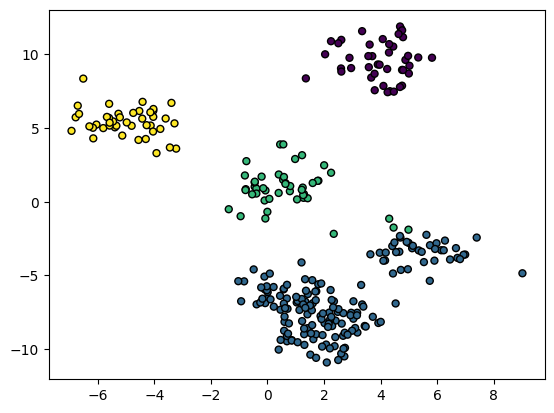

In [615]:
kmeans_1 = KMeans(n_clusters=4).fit(X4)
plt.scatter(X4[:, 0], X4[:, 1], c=kmeans_1.labels_, edgecolors="k", s=25)
plt.show()

In [622]:
k_means_1_scores = [
    round(silhouette_score(X4, kmeans_1.labels_), 2),
    round(davies_bouldin_score(X4, kmeans_1.labels_), 2)
]

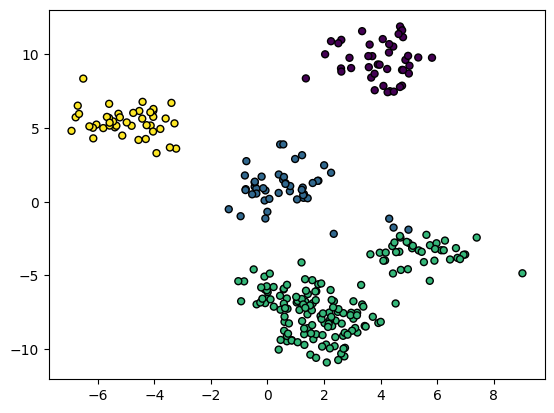

In [616]:
my_kmeans_1 = MyKMeans(k=4).fit(X4)
plt.scatter(X4[:, 0], X4[:, 1], c=my_kmeans_1.labels_, edgecolors="k", s=25)
plt.show()

In [623]:
my_k_means_1_scores = [
    round(silhouette_score(X4, my_kmeans_1.labels_), 2),
    round(davies_bouldin_score(X4, my_kmeans_1.labels_), 2)
]

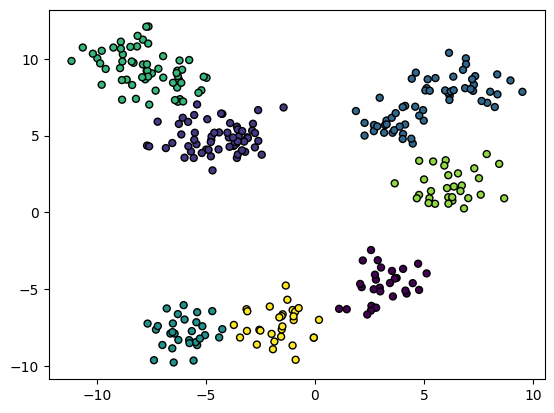

In [618]:
kmeans_2 = KMeans(n_clusters=7).fit(X5)
plt.scatter(X5[:, 0], X5[:, 1], c=kmeans_2.labels_, edgecolors="k", s=25)
plt.show()

In [624]:
k_means_2_scores = [
    round(silhouette_score(X5, kmeans_2.labels_), 2),
    round(davies_bouldin_score(X5, kmeans_2.labels_), 2)
]

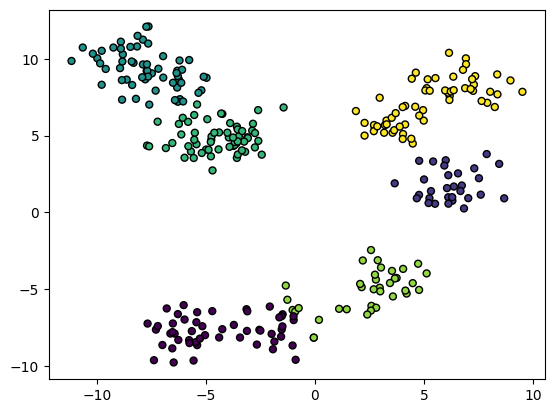

In [619]:
my_kmeans_2 = MyKMeans(k=7).fit(X5)
plt.scatter(X5[:, 0], X5[:, 1], c=my_kmeans_2.labels_, edgecolors="k", s=25)
plt.show()

In [625]:
my_k_means_2_scores = [
    round(silhouette_score(X5, my_kmeans_2.labels_), 2),
    round(davies_bouldin_score(X5, my_kmeans_2.labels_), 2)
]

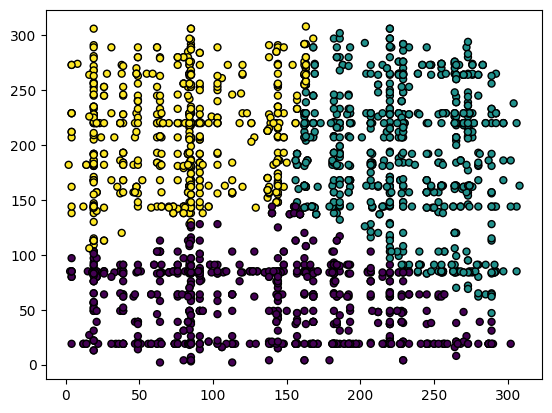

In [620]:
kmeans_3 = KMeans(n_clusters=3).fit(X6)
plt.scatter(X6[:, 0], X6[:, 1], c=kmeans_3.labels_, edgecolors="k", s=25)
plt.show()

In [626]:
k_means_3_scores = [
    round(rand_score(y6, kmeans_3.labels_), 2),
    round(fowlkes_mallows_score(y6, kmeans_3.labels_), 2),
    round(silhouette_score(X6, kmeans_3.labels_), 2),
    round(davies_bouldin_score(X6, kmeans_3.labels_), 2)
]

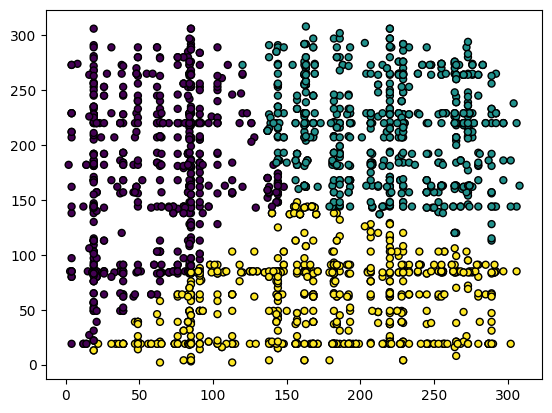

In [621]:
my_kmeans_3 = MyKMeans(k=3).fit(X6)
plt.scatter(X6[:, 0], X6[:, 1], c=my_kmeans_3.labels_, edgecolors="k", s=25)
plt.show()

In [627]:
my_k_means_3_scores = [
    round(rand_score(y6, my_kmeans_3.labels_), 2),
    round(fowlkes_mallows_score(y6, my_kmeans_3.labels_), 2),
    round(silhouette_score(X6, my_kmeans_3.labels_), 2),
    round(davies_bouldin_score(X6, my_kmeans_3.labels_), 2)
]

## Видим небольшие различия в кластеризации собственного K-means и из sklearn. Скорее всего это связано с более эффективным начальным выбором центроидов 

In [644]:
import pandas as pd

# Создание DataFrame
data = {
    ("Внутренние метрики", "Silhouette score"): [k_means_1_scores[0], my_k_means_1_scores[0], k_means_2_scores[0], my_k_means_2_scores[0], k_means_3_scores[2], my_k_means_3_scores[2]],
    ("Внутренние метрики", "Davies Bouldin score"): [k_means_1_scores[1], my_k_means_1_scores[1], k_means_2_scores[1], my_k_means_2_scores[1], k_means_3_scores[3], my_k_means_3_scores[3]],
    ("Внешние метрики", "Rand Index"): ["-", "-", "-", "-", k_means_3_scores[0], my_k_means_3_scores[0]],
    ("Внешние метрики", "Fowlkes Mallows Score"): ["-", "-", "-", "-",  k_means_3_scores[1], my_k_means_3_scores[1]],
}

index = ["(1) k-means из Sklearn", "(1) программный k-means", "(2) k-means из Sklearn", "(2) программный k-means", "(3) k-means из Sklearn", "(3) программный k-means"]

df = pd.DataFrame(data, index=index)

# Установка многоуровневого заголовка
df.columns = pd.MultiIndex.from_tuples(df.columns)

# Показать таблицу
df


Внутренние метрики                       \
                          Silhouette score Davies Bouldin score   
(1) k-means из Sklearn                0.62                 0.44   
(1) программный k-means               0.62                 0.44   
(2) k-means из Sklearn                0.58                 0.58   
(2) программный k-means               0.56                 0.60   
(3) k-means из Sklearn                0.39                 0.83   
(3) программный k-means               0.40                 0.84   

                        Внешние метрики                        
                             Rand Index Fowlkes Mallows Score  
(1) k-means из Sklearn                -                     -  
(1) программный k-means               -                     -  
(2) k-means из Sklearn                -                     -  
(2) программный k-means               -                     -  
(3) k-means из Sklearn             0.45                  0.46  
(3) программный k-means            0.45                  0.46

# Вывод

Хуже всего для кластеризации данных справилась модель DBSCAN. Это связано с тем, что данные не подошли под неё. Остальные алгоритмы справииль неплохо, но лучше всего оказался EM алгортм. Скорее всего это из-за того, что данные синтетически генерируются так, что этот алгоритм выполняет обратные действия, поэтому показываетс себя идеально. Если не считать этот алгоритм, то лучше всего справился k-means. На датасете классификации ни один алгоритм себя не показал хорошо, так как данные очень плохие для данной задачи